<h1> Desafio 1 - Grupo 2</h1>

<a id="section_integrantes"></a> 
## Integrantes

*  Márquez, Lucas Andrés
*  Mazzi, Agustin Estanislao
*  Murat, Natalia
*  Morinigo, Pablo Daniel
*  Quintana, Maria Dolores

---


<a id="section_toc"></a>
## <u>Tabla de Contenidos</u>

[1. Introduccion](#section_intro)

<!-- [Dataset](#section_dataset)

[Imports](#section_imports)   -->

[2. Valores Faltantes](#section_limpieza_datos) 

[3. Limpieza de Outliers](#section_limpieza_de_outliers)

[4. Eliminacion de Duplicados](#section_elim_dup)

[5. Nuevos Campos](#section_varnuevas)

[6. Dataset Final](#section_dbfinal)

---


## 1. Introduccion

[volver a TOC](#section_toc)

El objetivo de este desafio consiste en efectuar una limpieza del dataset provisto diseñando estrategias
para lidiar con los datos perdidos en ciertas variables, realizar un análisis descriptivo de las principales variables y si en necesario crear nuevas columnas a partir de las características dadas que puedan tener valor
predictivo.

---


**1.1. Dataset**:

Usaremos un dataset que publica periódicamente la inmobiliaria Properati y que contiene información sobre ofertas de propiedades para la venta:

https://drive.google.com/drive/folders/1qEIWk8Wyp7w_ic5XwACuSiD9K4aiYlOW?usp=sharing 

El dataset contiene información sobre todas las propiedades georeferenciadas de la base de
datos de la empresa. La información que incluye de cada propiedad es la siguiente:
* ID de registro
* Tipo de la propiedad (house, apartment, ph)
* Operación del aviso (sell, rent)
* Nombre del lugar
* Nombre del lugar + nombre de sus ‘padres’
* ID de geonames del lugar (si está disponible)
* Latitud, longitud
* Precio original del aviso
* Moneda original del aviso (ARS, USD)
* Precio del aviso en moneda local (ARS)
* Precio aproximado en USD
* Superficie en m2
* Superficie cubierta en m2
* Precio en USD/m2
* Precio por m2
* N° de piso, si corresponde
* Ambientes
* URL en Properati
* Descripción
* Título
* URL de un thumbnail de la primera foto

---
---

<a id="section_imports"></a> 
**1.2. Imports**:

[volver a TOC](#section_toc)

In [1]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import median
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline
import plotly.express as px
import chart_studio
import chart_studio.plotly as py

In [2]:
data = pd.read_csv("properatti.csv")
data.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

In [3]:
pd.set_option('display.max_columns', None)
data.head(2)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.0,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...


**1.2. Elimino columnas:** eliminamos las columnas que no vamos a utilizar

[volver a TOC](#section_toc)

In [4]:
data.drop(['Unnamed: 0','image_thumbnail','properati_url',], axis=1,inplace=True)

<a id="section_limpieza_datos"></a> 
## 2. Limpieza de Datos

[2.1. Columnas relacionadas con el precio: 'price', 'currency', 'price_aprox_local_currency' y 'price_aprox_usd'](#section_price)

[2.2. Columnas relacionadas con la superficie: 'surface_total_in_m2' y 'surface_covered_in_m2'](#section_metros)

[2.3. Columnas Rooms](#section_rooms)

[2.4. Columnas Floor](#section_floor)

[2.5. Columnas de precio por metro cuadrado](#section_price_per_m2)


[volver a TOC](#section_toc)

In [5]:
data.isnull().mean()

operation                     0.000000
property_type                 0.000000
place_name                    0.000190
place_with_parent_names       0.000000
country_name                  0.000000
state_name                    0.000000
geonames_id                   0.154405
lat-lon                       0.425260
lat                           0.425260
lon                           0.425260
price                         0.168372
currency                      0.168380
price_aprox_local_currency    0.168372
price_aprox_usd               0.168372
surface_total_in_m2           0.324435
surface_covered_in_m2         0.164222
price_usd_per_m2              0.433947
price_per_m2                  0.276869
floor                         0.934837
rooms                         0.609058
expenses                      0.882346
description                   0.000016
title                         0.000000
dtype: float64

  <a id="section_price"></a> 
  
**2.1. Precio y moneda**:

[volver a TOC](#section_toc)

Tiene aproximadamente un 17% de nulos. Intentaremos completar estos valores faltantes aplicando regexs a las columnas titulo y descripcion.
En caso de encontrarlo, tambien actualizaremos los valores correspondientes a las columnas relacionadas (price_aprox_usd, price_aprox_local_currency y currency)

In [6]:
print(data['price'].shape[0])
print(data['price'].isnull().sum())
print(data['price'].isnull().mean())

121220
20410
0.1683715558488698


In [7]:
pattern_precio = "(?P<moneda>U\$S|USD|U\$D)\s?(?P<precio>\d+(([.]|,)\d+)?)"

pattern_precio_regex = re.compile(pattern_precio,flags = re.IGNORECASE) #Perform case-insensitive matching

desc_series = data['description']
title_series = data['title']

# Busco en description:
rdo_precio_d = desc_series.apply(lambda x: x if x is np.NaN else pattern_precio_regex.search(x))
precio_match_d=rdo_precio_d[rdo_precio_d.notnull()].apply(lambda x: x.group('precio') if x.group(4) is None else x.group('precio').replace(x.group(4) ,'')).astype(float)

#le doy un min al valor obtenido porque muchos avisos solo incluian el precio de la cochera
data.loc[precio_match_d[precio_match_d>30000].index,'price_usd_clean'] = precio_match_d[precio_match_d>30000]
data.loc[precio_match_d[precio_match_d>30000].index,'price_clean'] = precio_match_d[precio_match_d>30000]

# Busco en title:
rdo_precio_t = title_series.apply(lambda x: x if x is np.NaN else pattern_precio_regex.search(x))
precio_match_t=rdo_precio_t[rdo_precio_t.notnull()].apply(lambda x: x.group('precio') if x.group(4) is None else x.group('precio').replace(x.group(4) ,'')).astype(float)

# le doy un min al valor obtenido porque muchos avisos solo incluian el precio de la cochera
data.loc[precio_match_t[precio_match_t>30000].index,'price_usd_clean'] = precio_match_t[precio_match_t>30000]
data.loc[precio_match_t[precio_match_t>30000].index,'price_clean'] = precio_match_t[precio_match_t>30000]

# Completo la moneda para estos registros:
data.loc[data['price_usd_clean'].notnull(),'currency_clean'] = 'USD'

# Remplazo con la info de price y precio_usd:
data.loc[(data['price_aprox_usd'].notnull()) & (data['price_aprox_usd'] != 0) ,'price_usd_clean'] = data.loc[(data['price_aprox_usd'].notnull()) & (data['price_aprox_usd'] != 0),'price_aprox_usd']
data.loc[(data['price'].notnull()) & (data['price'] != 0) ,'price_clean'] = data.loc[(data['price'].notnull()) & (data['price'] != 0),'price']

# Creo price_local_currency_clean:
data['price_local_currency_clean'] = data['price_aprox_local_currency']

data.loc[(data['price_aprox_local_currency'].isnull()) & (data['currency_clean'] == 'USD'),'price_local_currency_clean'] = data.loc[(data['price_aprox_local_currency'].isnull()) & (data['currency_clean'] == 'USD'),'price_usd_clean']*17.6445

data.loc[data['currency'].notnull(),'currency_clean'] = data.loc[data['currency'].notnull(),'currency']
# data.loc[data['price_usd_clean'].notnull(),['price','price_usd_clean']]
# data[['precio','precio_usd_regex']].value_counts()
print(data['price_clean'].isnull().mean())

0.1472034317769345


Depues de aplicar regexs aun tenemos un 15% aprox. de nulos. Como la variable a estimar por el modelo es 'price_usd_per_m2' eliminaremos todos los nulls que no pudimos imputar

In [8]:
data.dropna(subset=['price_clean'],inplace=True) #estoy sacando tmb los 0 de price que eran nulos en price_clean
desc_series = data['description']
title_series = data['title']

Visualización final:

(0.0, 3000000.0)

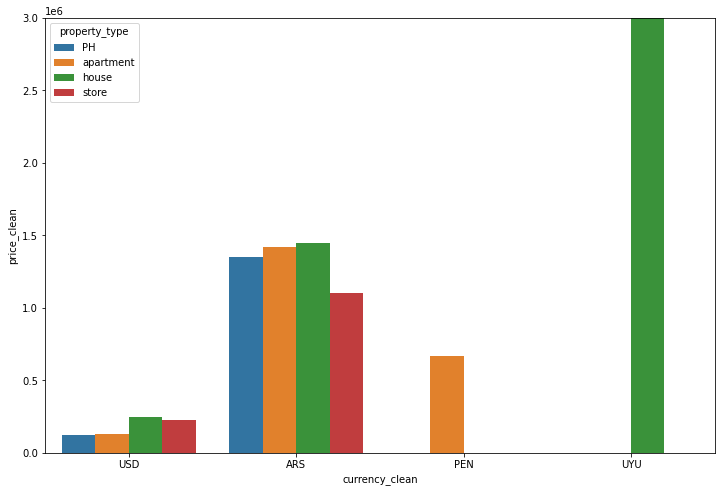

In [9]:
plt.figure(figsize =(12, 8))
sns.barplot(x = 'currency_clean', y = 'price_clean', hue = 'property_type', data = data, estimator=median, ci=None)
plt.ylim(0,3000000)

  <a id="section_metros"></a> 

**2.2. Metros totales y cubiertos**:

[volver a TOC](#section_toc)

Ahora trabajaremos con las metricas relacionadas con la superficie. La columna surface_total_in_m2 tiene aproximadamente un 31% de nulls y surface_covered_in_m2 13%
        


In [10]:
print(data['price'].shape[0])
print(data['surface_total_in_m2'].isnull().sum())
print(data['surface_total_in_m2'].isnull().mean())
print(data['surface_covered_in_m2'].isnull().sum())
print(data['surface_covered_in_m2'].isnull().mean())
#casos sin informacion en alguna de las dos variables:
print(data.loc[np.logical_xor(data['surface_total_in_m2'].notnull(),data['surface_covered_in_m2'].notnull())].shape[0])
#casos sin informacion tanto en surface_total_in_m2 como en surface_covered_in_m2:
print(data.loc[(data['surface_total_in_m2'].isnull()) & (data['surface_covered_in_m2'].isnull())].shape[0])

103376
32301
0.3124613062993345
13254
0.12821157715523912
30149
7703


Para los casos en los que alguno de los dos campos no es null, imputaremos el valor faltante en funcion del otro. Para eso calcularemos la proporcion media entre surface_total_in_m2 y surface_covered_in_m2 por tipo de propiedad: 

In [11]:
#primero corrijo los casos para los que la superficie total es menor que la cubierta suponiendo por los casos revisados que estan invertidos
data_filled=data.loc[(data['surface_total_in_m2'].notnull()) & (data['surface_covered_in_m2'].notnull())].copy()
data_filled['surface_total_in_m2_clean'] = data_filled.apply(lambda x: x['surface_covered_in_m2'] if x['surface_total_in_m2']<x['surface_covered_in_m2'] else x['surface_total_in_m2'],axis=1) 
data_filled['surface_covered_in_m2_clean'] = data_filled.apply(lambda x: x['surface_total_in_m2'] if x['surface_total_in_m2']<x['surface_covered_in_m2'] else x['surface_covered_in_m2'],axis=1)
data_filled['proporcion']=data_filled['surface_covered_in_m2_clean']/ data_filled['surface_total_in_m2_clean']
relacion_mts=data_filled.groupby('property_type').agg({'proporcion':'mean'})
relacion_mts

,proporcion
property_type,
PH,0.805497
apartment,0.885888
house,0.683985
store,0.929577


In [12]:
data_null_mts= data.loc[np.logical_xor(data['surface_total_in_m2'].notnull(),data['surface_covered_in_m2'].notnull())]
data_null_mts2=data_null_mts.merge(right= relacion_mts, how='left',on='property_type').set_axis(data_null_mts.index)
data_null_mts_tot=data_null_mts2.loc[data_null_mts2['surface_total_in_m2'].isnull(),['surface_covered_in_m2','proporcion']]
data_null_mts_cub=data_null_mts2.loc[data_null_mts2['surface_covered_in_m2'].isnull(),['surface_total_in_m2','proporcion']]
# Completo 'surface_total_in_m2_clean'
data['surface_total_in_m2_clean']=data.apply(lambda x: x['surface_covered_in_m2'] if x['surface_total_in_m2']<x['surface_covered_in_m2'] else x['surface_total_in_m2'],axis=1)
data.loc[data_null_mts_tot.index,'surface_total_in_m2_clean'] = data_null_mts_tot['surface_covered_in_m2']/data_null_mts_tot['proporcion']
# Completo 'surface_covered_in_m2_clean'
#data['surface_covered_in_m2_clean']=data['surface_covered_in_m2'] lo cambie!:
data['surface_covered_in_m2_clean']=data.apply(lambda x: x['surface_total_in_m2'] if x['surface_total_in_m2']<x['surface_covered_in_m2'] else x['surface_covered_in_m2'],axis=1)
data.loc[data_null_mts_cub.index,'surface_covered_in_m2_clean'] = data_null_mts_cub['surface_total_in_m2']*data_null_mts_cub['proporcion']

  **2.2.2.** Para los casos en los que ambos valores son nulos utilizaremos regexs para extraer el dato de las columnas titulo y descripcion

In [13]:
null_mts_cubytot=data.loc[(data['surface_total_in_m2'].isnull()) & (data['surface_covered_in_m2'].isnull())]
data.loc[(data['surface_total_in_m2'].isnull()) & (data['surface_covered_in_m2'].isnull())].shape[0]

7703

In [14]:
# comienzo con la regex mas general y depues voy reemplazando los casos en los que puedo identificar si es total o cubierta
pattern_mts ='(?P<metros>\d\d+(([.]|,)\d+)?)(\s)?(m2|metros|metros2|mts2|mt2|m²|mts²|mts|superficie)'
pattern_mts_regex = re.compile(pattern_mts,flags = re.IGNORECASE) #Perform case-insensitive matching

# Busco en description:
rdo_mts_d = desc_series.apply(lambda x: x if x is np.NaN else pattern_mts_regex.search(x))

mts_match_d=rdo_mts_d[rdo_mts_d.notnull()].apply(lambda x: x if x is np.NaN else x.group('metros').replace(',','.')).astype(float).round()
data.loc[mts_match_d.index,'surface_total_in_m2_regex'] = mts_match_d
data.loc[mts_match_d.index,'surface_covered_in_m2_regex'] = mts_match_d
# Busco en title:
rdo_mts_t = title_series.apply(lambda x: x if x is np.NaN else pattern_mts_regex.search(x))
mts_match_t=rdo_mts_t[rdo_mts_t.notnull()].apply(lambda x: x if x is np.NaN else x.group('metros').replace(',','.')).astype(float).round()
data.loc[mts_match_t.index,'surface_total_in_m2_regex'] = mts_match_t
data.loc[mts_match_t.index,'surface_covered_in_m2_regex'] = mts_match_t

Metros Cubiertos:

In [15]:
pattern_mtscub = "(?<!\d)(m2|metros|metros2|mts2|mt2|m²|mts²|mts|m|mt|sup|superficie|m2superficie|m2 superficie|m2 sup|m2sup)\s?[.]?\s?(cub|cubierta|cubierto|cubiertos)(\s?(:|[.])?\s?)(?P<metros>\d\d+(([.]|,)\d+)?)"

pattern_mtscub_regex = re.compile(pattern_mtscub,flags = re.IGNORECASE) #Perform case-insensitive matching

# Busco en description:
rdo_mtscub_d = desc_series.apply(lambda x: x if x is np.NaN else pattern_mtscub_regex.search(x))
mtscub_match_d=rdo_mtscub_d[rdo_mtscub_d.notnull()].apply(lambda x: x if x is np.NaN else x.group('metros').replace(',','.')).astype(float).round()
data.loc[mtscub_match_d.index,'surface_covered_in_m2_regex'] = mtscub_match_d

# Busco en title:
rdo_mtscub_t = title_series.apply(lambda x: x if x is np.NaN else pattern_mtscub_regex.search(x))
mtscub_match_t=rdo_mtscub_t[rdo_mtscub_t.notnull()].apply(lambda x: x if x is np.NaN else x.group('metros').replace(',','.')).astype(float).round()
data.loc[mtscub_match_t.index,'surface_covered_in_m2_regex'] = mtscub_match_t

# data['surface_covered_in_m2_regex'].value_counts()

In [16]:
pattern_mtscub_v1 = '(?P<metros>\d\d+(([.]|,)\d+)?)(\s)?(m2|metros|metros2|mts2|m²|mts²|mt2|mts|m|mt|sup|superficie|m2superficie|m2 superficie|m2 sup|m2sup)\s?[.]?\s?(cub|cubierta|cubierto|cubiertos)'

pattern_mtscub_regex_v1 = re.compile(pattern_mtscub_v1,flags = re.IGNORECASE) #Perform case-insensitive matching

# Busco en description:
rdo_mtscub_d_v1 = desc_series.apply(lambda x: x if x is np.NaN else pattern_mtscub_regex_v1.search(x))
mtscub_match_d_v1=rdo_mtscub_d_v1[rdo_mtscub_d_v1.notnull()].apply(lambda x: x if x is np.NaN else x.group('metros').replace(',','.')).astype(float).round()
data.loc[mtscub_match_d_v1.index,'surface_covered_in_m2_regex'] = mtscub_match_d_v1

# Busco en title:
rdo_mtscub_t_v1 = title_series.apply(lambda x: x if x is np.NaN else pattern_mtscub_regex_v1.search(x))
mtscub_match_t_v1=rdo_mtscub_t_v1[rdo_mtscub_t_v1.notnull()].apply(lambda x: x if x is np.NaN else x.group('metros').replace(',','.')).astype(float).round()
data.loc[mtscub_match_t_v1.index,'surface_covered_in_m2_regex'] = mtscub_match_t_v1
#data['surface_covered_in_m2_regex'].value_counts()

# Incorporo estos valores para sacar los nulos de 'surface_covered_in_m2_clean'
data.loc[data['surface_covered_in_m2_clean'].isnull(),'surface_covered_in_m2_clean'] = data.loc[data['surface_covered_in_m2_clean'].isnull(),'surface_covered_in_m2_regex']

#data['surface_covered_in_m2_clean'].isnull().sum() #19907
# data.loc[(data['surface_covered_in_m2'].isnull()) & (data['surface_covered_in_m2_regex'].notnull()),['surface_covered_in_m2_regex','surface_covered_in_m2']]

Metros Totales:

In [17]:
pattern_mtstot = "(?<!\d)(m2|metros|metros2|mts2|mt2|m²|mts²|mts|m|mt|sup|superficie|m2superficie|m2 superficie|m2 sup|m2sup)\s?[.]?\s?(tot|total|totales|de la propiedad|propiedad)(\s?(:|[.])?\s?)(?P<metros>\d\d+(([.]|,)\d+)?)"

pattern_mtstot_regex = re.compile(pattern_mtstot,flags = re.IGNORECASE) #Perform case-insensitive matching

# Busco en description:
rdo_mtstot_d = desc_series.apply(lambda x: x if x is np.NaN else pattern_mtstot_regex.search(x))
mtstot_match_d=rdo_mtstot_d[rdo_mtstot_d.notnull()].apply(lambda x: x if x is np.NaN else x.group('metros').replace(',','.')).astype(float).round()
data.loc[mtstot_match_d.index,'surface_total_in_m2_regex'] = mtstot_match_d

# Busco en title:
rdo_mtstot_t = title_series.apply(lambda x: x if x is np.NaN else pattern_mtstot_regex.search(x))
mtstot_match_t=rdo_mtstot_t[rdo_mtstot_t.notnull()].apply(lambda x: x if x is np.NaN else x.group('metros').replace(',','.')).astype(float).round()
data.loc[mtstot_match_t.index,'surface_total_in_m2_regex'] = mtstot_match_t

# data['surface_total_in_m2_regex'].value_counts()

In [18]:
pattern_mtstot_v1 ='(?P<metros>\d\d+(([.]|,)\d+)?)(\s)?(m2|metros|metros2|mts2|mt2|m²|mts²|mts|m|mt|sup|superficie|m2superficie|m2 superficie|m2 sup|m2sup)\s?[.]?\s?(tot|total|totales|de la propiedad|propiedad)'
pattern_mtstot_regex_v1 = re.compile(pattern_mtstot_v1,flags = re.IGNORECASE) #Perform case-insensitive matching

# Busco en description:
rdo_mtstot_d_v1 = desc_series.apply(lambda x: x if x is np.NaN else pattern_mtstot_regex_v1.search(x))
mtstot_match_d_v1=rdo_mtstot_d_v1[rdo_mtstot_d_v1.notnull()].apply(lambda x: x if x is np.NaN else x.group('metros').replace(',','.')).astype(float).round()
data.loc[mtstot_match_d_v1.index,'surface_total_in_m2_regex'] = mtstot_match_d_v1

# Busco en title:
rdo_mtstot_t_v1 = title_series.apply(lambda x: x if x is np.NaN else pattern_mtstot_regex_v1.search(x))
mtstot_match_t_v1=rdo_mtstot_t_v1[rdo_mtstot_t_v1.notnull()].apply(lambda x: x if x is np.NaN else x.group('metros').replace(',','.')).astype(float).round()
data.loc[mtstot_match_t_v1.index,'surface_total_in_m2_regex'] = mtstot_match_t_v1

# data['surface_total_in_m2_regex'].value_counts()
# data.loc[(data['surface_total_in_m2'].isnull()) & (data['surface_total_in_m2_regex'].notnull()),['surface_total_in_m2_regex','surface_total_in_m2']]
# Incorporo estos valores para salcar los nulos de 'surface_total_in_m2_clean'
data.loc[data['surface_total_in_m2_clean'].isnull(),'surface_total_in_m2_clean'] = data.loc[data['surface_total_in_m2_clean'].isnull(),'surface_total_in_m2_regex']

# data['surface_total_in_m2_clean'].isnull().sum() 


In [19]:
# Corrijo algunos casos donde la cubierta queda mayor que la total
data['surface_total_in_m2_clean'] = data.apply(lambda x: x['surface_covered_in_m2_clean'] if x['surface_total_in_m2_clean']<x['surface_covered_in_m2_clean'] else x['surface_total_in_m2_clean'],axis=1)

In [20]:
# data['surface_total_in_m2_clean'].isnull().sum()
# data['surface_covered_in_m2_clean'].isnull().sum()
data.dropna(subset=['surface_total_in_m2_clean'],inplace=True) 
data.dropna(subset=['surface_covered_in_m2_clean'],inplace=True)
desc_series = data['description']
title_series = data['title']

  <a id="section_rooms"></a> 

**2.3. Rooms**:

[volver a TOC](#section_toc)

Tiene casi 60 % de nulos. Utilizaremos regexs para extraer el dato de las columnas titulo y descripcion.



In [21]:
print(data['rooms'].isnull().sum())
print(data['rooms'].isnull().mean())

57173
0.5868471834455575


In [22]:
pattern_rooms = "(?P<numero_rooms>\d+)\s?(hab|dor)"

pattern_rooms_regex = re.compile(pattern_rooms,flags = re.IGNORECASE) #Perform case-insensitive matching

# Busco en description
rdo_rooms = desc_series.apply(lambda x: x if x is np.NaN else pattern_rooms_regex.search(x))
#resultado_rooms2[resultado_rooms2.notnull()]
rooms_match=rdo_rooms[rdo_rooms.notnull()].apply(lambda x: x if x is np.NaN else int(x.group('numero_rooms')))
rooms_match_desc=rooms_match[(rooms_match>0) & (rooms_match<16)]
# rooms_match_desc.value_counts()  

data.loc[rooms_match_desc.index,'rooms_regex'] = rooms_match_desc
# data[['rooms','rooms_regex1']].value_counts()
# data[(data['rooms'].isnull()) & (data['rooms_regex'].notnull())]['rooms_regex'].shape # arreglo 26052

# Busco en title
rdo_rooms_v1 = title_series.apply(lambda x: x if x is np.NaN else pattern_rooms_regex.search(x))

rooms_match_v1=rdo_rooms_v1[rdo_rooms_v1.notnull()].apply(lambda x: x if x is np.NaN else int(x.group('numero_rooms')))
rooms_match_desc_V1=rooms_match_v1[(rooms_match_v1>0) & (rooms_match_v1<16)]

# rooms_match_desc_V1.value_counts()   
data.loc[rooms_match_desc_V1.index,'rooms_regex'] = rooms_match_desc_V1
# data[(data['rooms'].isnull()) & (data['rooms_regex'].notnull())]['rooms_regex'].shape # arreglo 27153

In [23]:
pattern_rooms_v2 = "(?P<numero_rooms>(un|una|dos|tres|cuatro|cinco|seis|siete|ocho|nueve))\s?(hab|dor)"
pattern_rooms_regex_v2 = re.compile(pattern_rooms_v2,flags = re.IGNORECASE) #Perform case-insensitive matching

# Busco en description
rdo_rooms_v2 = desc_series.apply(lambda x: x if x is np.NaN else pattern_rooms_regex_v2.search(x))
rooms_match_v2=rdo_rooms_v2[rdo_rooms_v2.notnull()].apply(lambda x: x if x is np.NaN else (x.group('numero_rooms')).lower())

rooms_match_desc_v2= rooms_match_v2.replace({'un': 1,'una': 1 ,'dos': 2,'tres': 3,'cuatro': 4,'cinco': 5,'seis': 6,'siete': 7,'ocho': 8,'nueve': 9}).astype(int)
# rooms_match_desc_v2[rooms_match_v2.notnull()].value_counts()
data.loc[rooms_match_desc_v2.index,'rooms_regex'] = rooms_match_desc_v2
# data[data['rooms'].isnull() & data['rooms_regex'].notnull()]['rooms_regex'].shape # arreglo 41272

# Busco en title
rdo_rooms_v3 = title_series.apply(lambda x: x if x is np.NaN else pattern_rooms_regex_v2.search(x))
rooms_match_v3=rdo_rooms_v3[rdo_rooms_v3.notnull()].apply(lambda x: x if x is np.NaN else (x.group('numero_rooms')).lower())

rooms_match_desc_v3= rooms_match_v3.replace({'un': 1,'una': 1 ,'dos': 2,'tres': 3,'cuatro': 4,'cinco': 5,'seis': 6,'siete': 7,'ocho': 8,'nueve': 9}).astype(int)
#rooms_match_desc_v3[rooms_match_v3.notnull()].value_counts()
data.loc[rooms_match_desc_v3.index,'rooms_regex'] = rooms_match_desc_v3

#data[(data['rooms'].isnull()) & (data['rooms_regex'].isnull())]['rooms_regex'].shape # arreglo faltan 32423
#data['rooms'].isnull().shape #121220

In [24]:
# armo regexs con la referencia ambientes
pattern_ambientes = "(?P<numero_amb>\d+)\s?(amb)"

pattern_ambientes_regex = re.compile(pattern_ambientes,flags = re.IGNORECASE) #Perform case-insensitive matching

# Busco en description
rdo_amb = desc_series.apply(lambda x: x if x is np.NaN else pattern_ambientes_regex.search(x))

amb_match=rdo_amb[rdo_amb.notnull()].apply(lambda x: x if x is np.NaN else (int(x.group('numero_amb'))-1))
data.loc[amb_match.index,'rooms_regex'] = amb_match        
# data[(data['rooms'].isnull()) & (data['rooms_regex'].isnull())]['rooms_regex'].shape # arreglo faltan 21439

# Busco en title
rdo_amb_v1 = title_series.apply(lambda x: x if x is np.NaN else pattern_ambientes_regex.search(x))

amb_match_v1=rdo_amb_v1[rdo_amb_v1.notnull()].apply(lambda x: x if x is np.NaN else (int(x.group('numero_amb'))-1))
data.loc[amb_match_v1.index,'rooms_regex'] = amb_match_v1
# data[(data['rooms'].isnull()) & (data['rooms_regex'].isnull())]['rooms_regex'].shape # arreglo faltan 20283


In [25]:
# armo regexs con la referencia ambientes
pattern_ambientes_v2 = "(?P<numero_amb>(un|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez))\s?(amb)"

pattern_ambientes_regex_v2 = re.compile(pattern_ambientes_v2,flags = re.IGNORECASE) #Perform case-insensitive matching

# Busco en description
rdo_amb_v3 = desc_series.apply(lambda x: x if x is np.NaN else pattern_ambientes_regex_v2.search(x))
#rdo_amb_v3[rdo_amb_v3.notnull()]
#no me funciona!!: amb_match_v3=rdo_amb_v3[rdo_amb_v3.notnull()].apply(lambda x: x if x is np.NaN else (x.group('numero_amb').lower().replace({'un': 1,'dos': 2,'tres': 3,'cuatro': 4,'cinco': 5,'seis': 6}).astype(int))
amb_match_v3=rdo_amb_v3[rdo_amb_v3.notnull()].apply(lambda x: x if x is np.NaN else (x.group('numero_amb').lower()))
data.loc[amb_match_v3.index,'rooms_regex'] = ((amb_match_v3.replace({'un': 1,'dos': 2,'tres': 3,'cuatro': 4,'cinco': 5,'seis': 6,'siete': 7,'ocho': 8,'nueve': 9,'diez': 10}).astype(int))-1 )

# Busco en title
rdo_amb_v4 = title_series.apply(lambda x: x if x is np.NaN else pattern_ambientes_regex_v2.search(x))

amb_match_v4=rdo_amb_v4[rdo_amb_v4.notnull()].apply(lambda x: x if x is np.NaN else (x.group('numero_amb').lower()))
data.loc[amb_match_v4.index,'rooms_regex'] = ((amb_match_v4.replace({'un': 1,'dos': 2,'tres': 3,'cuatro': 4,'cinco': 5,'seis': 6,'siete': 7,'ocho': 8,'nueve': 9,'diez': 10}).astype(int))-1 )
# data[data['rooms_regex'].isnull() & data['rooms'].isnull()].shape

In [26]:
# armo regexs con la referencia ambientes
pattern_ambientes_v3 = "(?P<numero_amb>(ambiente divisible|monoamb|ambiente unico|unico ambiente))"

pattern_ambientes_regex_v3 = re.compile(pattern_ambientes_v3,flags = re.IGNORECASE) #Perform case-insensitive matching

# Busco en description
rdo_amb_v5 = desc_series.apply(lambda x: x if x is np.NaN else pattern_ambientes_regex_v3.search(x))

amb_match_v5=rdo_amb_v5[rdo_amb_v5.notnull()].apply(lambda x: x if x is np.NaN else 0)
data.loc[amb_match_v5.index,'rooms_regex'] = amb_match_v5.astype(int)

# Busco pattern_ambientes_v3 en title 
rdo_amb_v6 = title_series.apply(lambda x: x if x is np.NaN else pattern_ambientes_regex_v3.search(x))

amb_match_v6=rdo_amb_v6[rdo_amb_v6.notnull()].apply(lambda x: x if x is np.NaN else 0)
data.loc[amb_match_v6.index,'rooms_regex'] = amb_match_v6.astype(int)

In [27]:
# Lo que cargan en el campo rooms son en gral los ambientes y la imputacion mediante busqueda de patrones es mas confiable que la de dormitorios
# Por lo tanto, para los nulls, buscamos patrones de dormitorios y luego los reemplazamos por los de ambientes en caso de que esten
data['ambientes'] = data['rooms']
data['ambientes_regex'] = data['rooms_regex']+1
data.loc[(data['ambientes'].isnull()) & (data['rooms_regex'].notnull()),'ambientes']=data.loc[(data['ambientes'].isnull()) & (data['rooms_regex'].notnull()),'ambientes_regex']

Visualización final:

(0.0, 20.0)

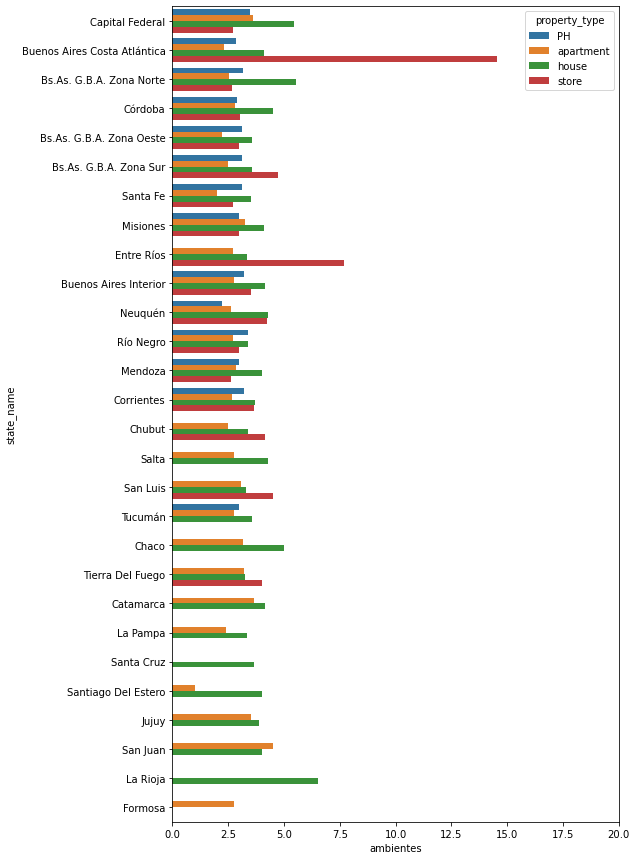

In [28]:
plt.figure(figsize =(8, 15))
sns.barplot(y = 'state_name', x = 'ambientes', hue = 'property_type', data = data, ci=None)
plt.xlim(0,20)

##### **2.4. Columna floor** <a name="section_floor"></a>

In [29]:
#obtenemos serie de col 'description' para departamentos
# empezamos con 64544 registros
depto_mask = data['property_type']=='apartment'
null_floor_mask = data['floor'].isnull()
depto_null_floor_mask = np.logical_and(depto_mask,null_floor_mask)
pisos_depto = data.loc[depto_null_floor_mask,['description']]
pisos_depto_txt = pisos_depto['description']

In [30]:
# regex ordinales abreviados
pat_ord_abv = "(?P<piso_ord>\d\d?\s?(er|do|to|mo|vo|no|ero)\.?\s*piso)"
rx_ord_abv = re.compile(pat_ord_abv, flags=re.IGNORECASE)
resultado_ord_abv = pisos_depto_txt.apply(lambda x: rx_ord_abv.search(str(x)))
match_ord_abv = resultado_ord_abv.apply(lambda x : x if x is None else x.group('piso_ord'))
ord_abv_not_null_mask = match_ord_abv.notnull()
full_ord_abv = match_ord_abv[ord_abv_not_null_mask]
pat_nro_piso = "(?P<piso_nro>\d\d?)"
rx_nro_piso = re.compile(pat_nro_piso, flags=re.IGNORECASE)
resultado_nro_piso = full_ord_abv.apply(lambda x: rx_nro_piso.search(x))
#RESULTADO regex ordinales abreviados
match_nro_piso = resultado_nro_piso.apply(lambda x : x if x is None else x.group('piso_nro'))
#borramos los registros ya tratados
pisos_depto_txt = pisos_depto_txt.drop(match_nro_piso.index)

In [31]:
# regex ordinales en palabras
pat_ord_ext ="(?P<piso_ord_ext>primero|primer|segundo|tercero|tercer|cuarto|quinto|sexto|septimo|séptimo|octavo|noveno|decimo|décimo|undécimo|undecimo)\s?piso"
rx_ord_ext = re.compile(pat_ord_ext,flags=re.IGNORECASE)
resultado_ord_ext= pisos_depto_txt.apply(lambda x: x if x is None else rx_ord_ext.search(str(x)))
match_ord_ext = resultado_ord_ext.apply(lambda x : x if x is None else x.group('piso_ord_ext'))
match_ord_ext_not_null = match_ord_ext.notnull()
ord_ext_full = match_ord_ext[match_ord_ext_not_null]
#llevamos todo a minuscula
ordinal_extendido = ord_ext_full.apply(lambda x: str(x).lower()) 
#replace de palabras por nro de piso usamos dict
valores_viejos = ordinal_extendido.unique()
valores_nuevos = np.array([10,1,2,4,7,3,10,5,6,9,8,7,3,1])
mapping = dict(zip(valores_viejos, valores_nuevos))
#hacemos el replace
#RESULTADO regex ordinales extendidos
ordinal_dict = ordinal_extendido.replace(mapping)
ordinal_dict.head()
#quitamos los registros ya tratados
pisos_depto_txt = pisos_depto_txt.drop(ordinal_dict.index)

In [32]:
#regex piso número
pat_piso_num ="(?P<piso_num>piso\s*\d?\d)"
rx_piso_num = re.compile(pat_piso_num,flags=re.IGNORECASE)
resultado_piso_num= pisos_depto_txt.apply(lambda x: x if x is None else rx_piso_num.search(str(x)))
match_piso_num = resultado_piso_num.apply(lambda x : x if x is None else x.group('piso_num'))
match_piso_num_mask = match_piso_num.notnull()
match_piso_full = match_piso_num[match_piso_num_mask]
match_piso_full=match_piso_full.drop(index=121160)
match_piso_full=match_piso_full.drop(index=121209)
#RESULTADO regex piso número
resultado_piso_num = match_piso_full.apply(lambda x: rx_nro_piso.search(x))
match_piso_num = resultado_piso_num.apply(lambda x : x if x is None else x.group('piso_nro'))
#quitamos los registros ya tratados
pisos_depto_txt = pisos_depto_txt.drop(match_piso_num.index)

In [33]:
# regex numéricas en palabras
pat_num_ext = "(piso\s*(?P<piso_num_ext>uno|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez|once|doce|trece|catorce|quince|dieciseis|dieciséis|diecisiete|dieciocho|diecinueve|veinte))"
rx_num_ext = re.compile(pat_num_ext,flags=re.IGNORECASE)
resultado_num_ext= pisos_depto_txt.apply(lambda x: x if x is None else rx_num_ext.search(str(x)))
match_num_ext = resultado_num_ext.apply(lambda x : x if x is None else x.group('piso_num_ext'))
match_num_ext_not_null = match_num_ext.notnull()
num_ext_full = match_num_ext[match_num_ext_not_null]
#llevamos todo a minuscula
num_extendido = num_ext_full.apply(lambda x: str(x).lower()) 
#replace de palabras por nro de piso usamos dict
valores_viejos = num_extendido.unique()
valores_viejos
valores_nuevos = np.array([7,3,2,13,9,4,11,10,12,8])
mapping = dict(zip(valores_viejos, valores_nuevos))
#hacemos el replace
#RESULTADO regex números extendidos
num_dict = num_extendido.replace(mapping)
#quitamos los registros ya tratados
pisos_depto_txt = pisos_depto_txt.drop(num_dict.index)

In [34]:
#regex grado piso
pat_grado = "(?P<piso_grado>(\s|\D)[0-9]{1,2}\s*(°|º)\s*(piso))"
rx_grado = re.compile(pat_grado,flags=re.IGNORECASE)
resultado_grado= pisos_depto_txt.apply(lambda x: x if x is None else rx_grado.search(str(x)))
match_grado = resultado_grado.apply(lambda x : x if x is None else x.group('piso_grado'))
match_grado_not_null = match_grado.notnull()
grado_full = match_grado[match_grado_not_null]
#RESULTADO regex piso grado
num_piso_grado = grado_full.apply(lambda x: rx_nro_piso.search(x))
match_piso_grado = num_piso_grado.apply(lambda x : x if x is None else x.group('piso_nro'))
#quitamos los registros ya tratados
pisos_depto_txt = pisos_depto_txt.drop(match_piso_grado.index)

In [35]:
#regex planta baja
pat_pb = "(?P<planta_baja>(en |ubicado en )(planta\s*baja|pta\.?\s*baja))"
rx_pb = re.compile(pat_pb,flags=re.IGNORECASE)
resultado_pb= pisos_depto_txt.apply(lambda x: x if x is None else rx_pb.search(str(x)))
match_pb= resultado_pb.apply(lambda x : x if x is None else x.group('planta_baja'))
match_pb_not_null = match_pb.notnull()
pb_full = match_pb[match_pb_not_null]
#llevamos todo a minuscula
pb = pb_full.apply(lambda x: str(x).lower())
#quitar los matches que tengan amenities  o espacios compartidos en pb
pb_compartida = pisos_depto_txt[pb.index]
pat_pb_compartida ="(?P<pb_comp>(cocheras|cochera|locales|negocios|negocio|pileta)\s(en planta baja|ubicada en planta baja|ubicados en planta baja|ubicada en planta baja|ubicado en planta baja))"
rx_pb_compartida = re.compile(pat_pb_compartida,flags=re.IGNORECASE)
#matches que indiquen pb compartida
resultado_pb_comp= pb_compartida.apply(lambda x: x if x is None else rx_pb_compartida.search(str(x)))
match_pb_comp= resultado_pb_comp.apply(lambda x : x if x is None else x.group('pb_comp'))
match_pb_comp_not_null = match_pb_comp.notnull()
pb_comp_full = match_pb_comp[match_pb_comp_not_null]
pb = pb.drop(pb_comp_full.index)
#también dropeamos registros que indiquen planta alta
pb_alta = pisos_depto_txt[pb.index]
pat_pa = "(?P<planta_alta>planta alta)"
rx_pa = re.compile(pat_pa,flags=re.IGNORECASE)
resultado_pa= pb_alta.apply(lambda x: x if x is None else rx_pa.search(str(x)))
match_pa= resultado_pa.apply(lambda x : x if x is None else x.group('planta_alta'))
match_pa_not_null = match_pa.notnull()
pa_full = match_pa[match_pa_not_null]
pb = pb.drop(pa_full.index)
# drop de registro con varios deptos
pb = pb.drop(index=121108)
pb = pb.drop(index=121109)
# pb = pb.drop(index=121110)
pb_a_reemplazar = pb.unique()
#RESULTADO regex pb
pb_cero = pb.replace(pb_a_reemplazar,0)
#quitamos los registros ya tratados
pisos_depto_txt = pisos_depto_txt.drop(pb_cero.index)

In [36]:
#Creamos la col clean_floor y completamos con los valores obtenidos
data.loc[match_nro_piso.index,"clean_floor"] = match_nro_piso 
data.loc[ordinal_dict.index,"clean_floor"] = ordinal_dict 
data.loc[match_piso_num.index,"clean_floor"] = match_piso_num 
data.loc[num_dict.index,"clean_floor"] = num_dict 
data.loc[match_piso_grado.index,"clean_floor"] = match_piso_grado 
data.loc[pb_cero.index,"clean_floor"] = pb_cero 

In [37]:
print("Nulos en floor antes de regex: "+str(data["floor"].isnull().mean()))
print("Nulos en floor después de regex: "+str(data["clean_floor"].isnull().mean()))

Nulos en floor antes de regex: 0.9301917392018394
Nulos en floor después de regex: 0.8745175726720316


[Volver a subíndice](#section_limpieza_datos)

[Volver a TOC](#section_toc)

  <a id="section_price_per_m2"></a> 

**2.5. Precio por metro cuadrado**

In [38]:
#para obtener el precio por m2, 
#la función divide el precio  por la sup. total
#si ese valor no está disponible, divide por la sup. cubierta

def get_price_per_m2(x):
    if(x[1]is not None and x[1]!=0):
        return x[0]/x[1]
    elif(x[2]is not None and x[2]!=0):
        return x[0]/x[2]
    else: 
        return np.NaN

In [39]:
price_not_null_mask = data['price_clean'].notnull()

In [40]:
#cálculo de price_usd_per_m2 a partir de precio en usd
total_price = data[['price_usd_clean','surface_total_in_m2_clean','surface_covered_in_m2_clean']]
price_usd_per_m2 = total_price.apply(get_price_per_m2,axis=1)

In [41]:
#creamos la col price_usd_per_m2_clean
data.loc[price_usd_per_m2.index,"price_usd_per_m2_clean"] = price_usd_per_m2

In [42]:
#cálculo de price_per_m2_clean a partir del precio total
#y creación de la col price_per_m2_clean
total_price_2 = data[['price_clean','surface_total_in_m2_clean','surface_covered_in_m2_clean']]
price_per_m2_in_any_currency = total_price_2.apply(get_price_per_m2,axis=1)
data.loc[price_per_m2_in_any_currency.index,"price_per_m2_clean"] = price_per_m2_in_any_currency

In [43]:
data.dropna(subset=['price_usd_per_m2_clean',"price_per_m2_clean"],inplace=True)

In [44]:
nn_mask = data['price_usd_per_m2_clean'].isnull()
nn_mask.sum()

0

Definimos una función para visualizar la distribución de la variable de precio en dólares ya limpia

In [45]:
def kde_prop_type(df,lim):
    fig = plt.figure(figsize=(5,2))
    sns.set_style('whitegrid')
    sns.kdeplot(data=depto, x=df, shade=True)
    plt.xlim(0,lim)
    plt.show()

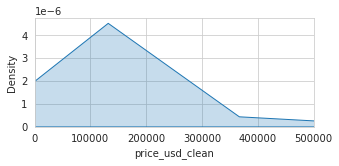

In [46]:
#estimación de la distribución de la variable precio en dólares
#para departamentos
depto_mask = data['property_type']=='apartment'
depto = data.loc[depto_mask,['surface_total_in_m2_clean','price_usd_clean']]

lim = 500000
kde_prop_type(depto.iloc[:,1],lim)

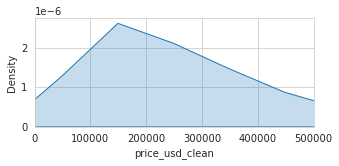

In [47]:
#estimación de la distribución de la variable precio en dólares
#para casas
casa_mask = data['property_type']=='house'
casa = data.loc[casa_mask,['surface_total_in_m2_clean','price_usd_clean']]
casa['price_usd_clean'].mean()
kde_prop_type(casa.iloc[:,1],500000)

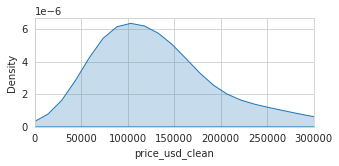

In [48]:
#estimación de la distribución de la variable precio en dólares
#para PH
ph_mask = data['property_type']=='PH'
ph = data.loc[ph_mask,['surface_total_in_m2_clean','price_usd_clean']]
kde_prop_type(ph.iloc[:,1],300000)

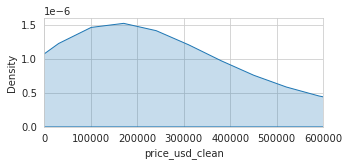

In [49]:
#estimación de la distribución de la variable precio en dólares
#para store
store_mask = data['property_type']=='store'
store = data.loc[store_mask,['surface_total_in_m2_clean','price_usd_clean']]
kde_prop_type(store.iloc[:,1],600000)

Definimos una función para visualizar mediante un diagrama de dispersión la relación entre las variable de precio en dólares y superficie total en m2

In [50]:
def scat_price_sup(df,x_lim,y_lim):
    sns.set_style('whitegrid')
    plt.figure(figsize=(5, 2))
    samp = df.sample(2000)
    sns.scatterplot(data=samp, x=samp.iloc[:,0], y=samp.iloc[:,1], s=20)
    plt.xlim(0, x_lim)
    plt.ylim(0, y_lim)
    plt.xlabel("Sup. total en m2"); plt.ylabel("Precio_USD");plt.title("Scatter Plot")
    plt.show()

Diagramas de dispersión del precio aprox. en dólares con respecto a la superficie total en m2 con sample de n=1000

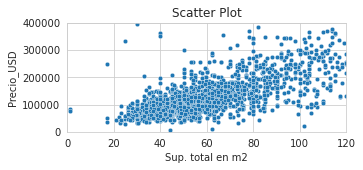

In [51]:
scat_price_sup(depto,120,400000)

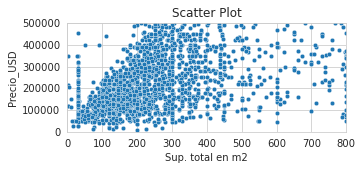

In [52]:
scat_price_sup(casa,800,500000)

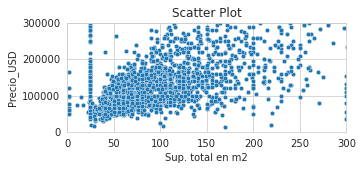

In [53]:
scat_price_sup(ph,300,300000)

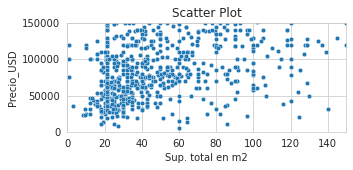

In [54]:
scat_price_sup(store,150,150000)

Jointplot que muestra la relación entre var sup total en m2 y precio en usd.
En los márgenes del gráfico se observa la distribución de 
cada una de las variables según el tipo de propiedad
tomamos una muestra de n=5000

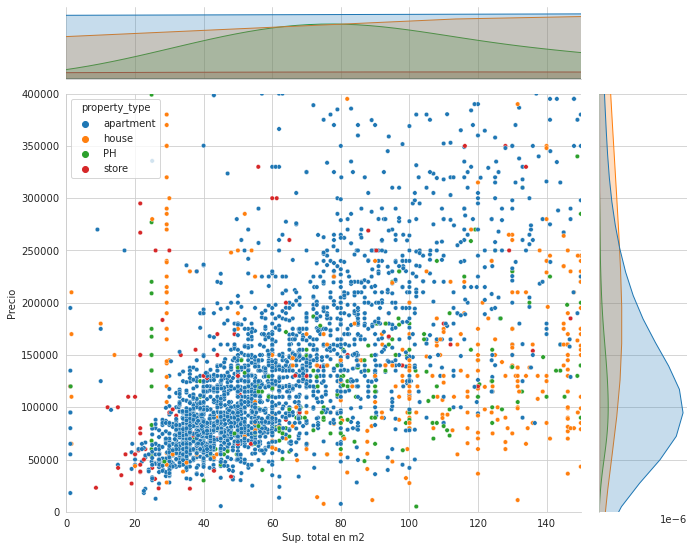

In [55]:
data_s = data.sample(5000) 
g = sns.jointplot(data=data_s, x='surface_total_in_m2_clean', y='price_usd_clean', hue='property_type', s=20)
g.fig.set_size_inches(10, 8)
g.set_axis_labels("Sup. total en m2", "Precio")
g.ax_marg_x.set_xlim(0, 150)
g.ax_marg_y.set_ylim(0, 400000)
plt.show()

Pairplot visualizar la correlación de variables principales

In [56]:
def set_limits(x,y,lx,ly):
    pair_p.axes[x,y].set_xlim(lx)
    pair_p.axes[x,y].set_ylim(ly)

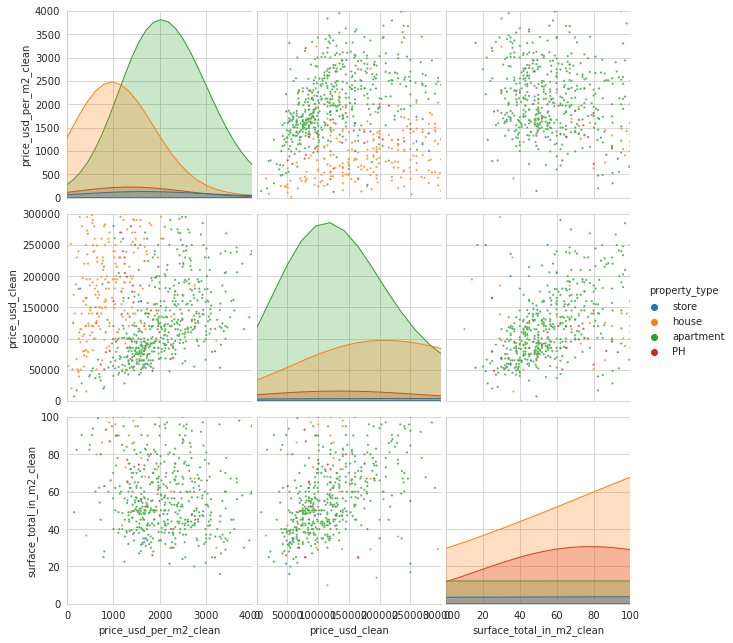

In [57]:
var_ppal = data[["price_usd_per_m2_clean","price_usd_clean","surface_total_in_m2_clean","property_type"]]
var_ppal_s = var_ppal.sample(1000) 
pair_p = sns.pairplot(data=var_ppal_s, hue='property_type', height=3, plot_kws = {"s":5,'alpha': 0.8});
set_limits(0,0,(0,4000),(0,4000))
set_limits(1,0,(0,4000),(0,300000))
set_limits(2,0,(0,4000),(0,100))

set_limits(0,1,(0,300000),(0,4000))
set_limits(1,1,(0,300000),(0,300000))
set_limits(2,1,(0,300000),(0,100))

set_limits(0,2,(0,100),(0,4000))
set_limits(1,2,(0,100),(0,300000))
set_limits(2,2,(0,100),(0,100))

[Volver a subíndice](#section_limpieza_datos)

[Volver a TOC](#section_toc)

<a id="section_limpieza_de_outliers"></a> 
## 3. Limpieza de Outliers

[volver a TOC](#section_toc)

In [58]:
#limpieza de outliers y casos duplicados
#creo un dataset de acuerdo a cada tipo de propiedad

np.unique(data.property_type)

#creo un dataset para cada tipo de propiedad (para quitar outliers de acuedo a cada categoría)

mask_ph = data["property_type"]=="PH"
mask_dpto = data["property_type"]=="apartment"
mask_house = data["property_type"]=="house"
mask_store = data["property_type"]=="store"

data_ph = data[mask_ph]
data_dpto = data[mask_dpto]
data_house = data[mask_house]
data_store = data[mask_store]

lista = data_store.state_name.unique()

mascaras_store = pd.DataFrame({x: [data_store["state_name"]==l for l in lista] for x in lista})
mascaras_ph = pd.DataFrame({x: [data_ph["state_name"]==l for l in lista] for x in lista})
mascaras_dpto = pd.DataFrame({x: [data_dpto["state_name"]==l for l in lista] for x in lista})
mascaras_house = pd.DataFrame({x: [data_house["state_name"]==l for l in lista] for x in lista})

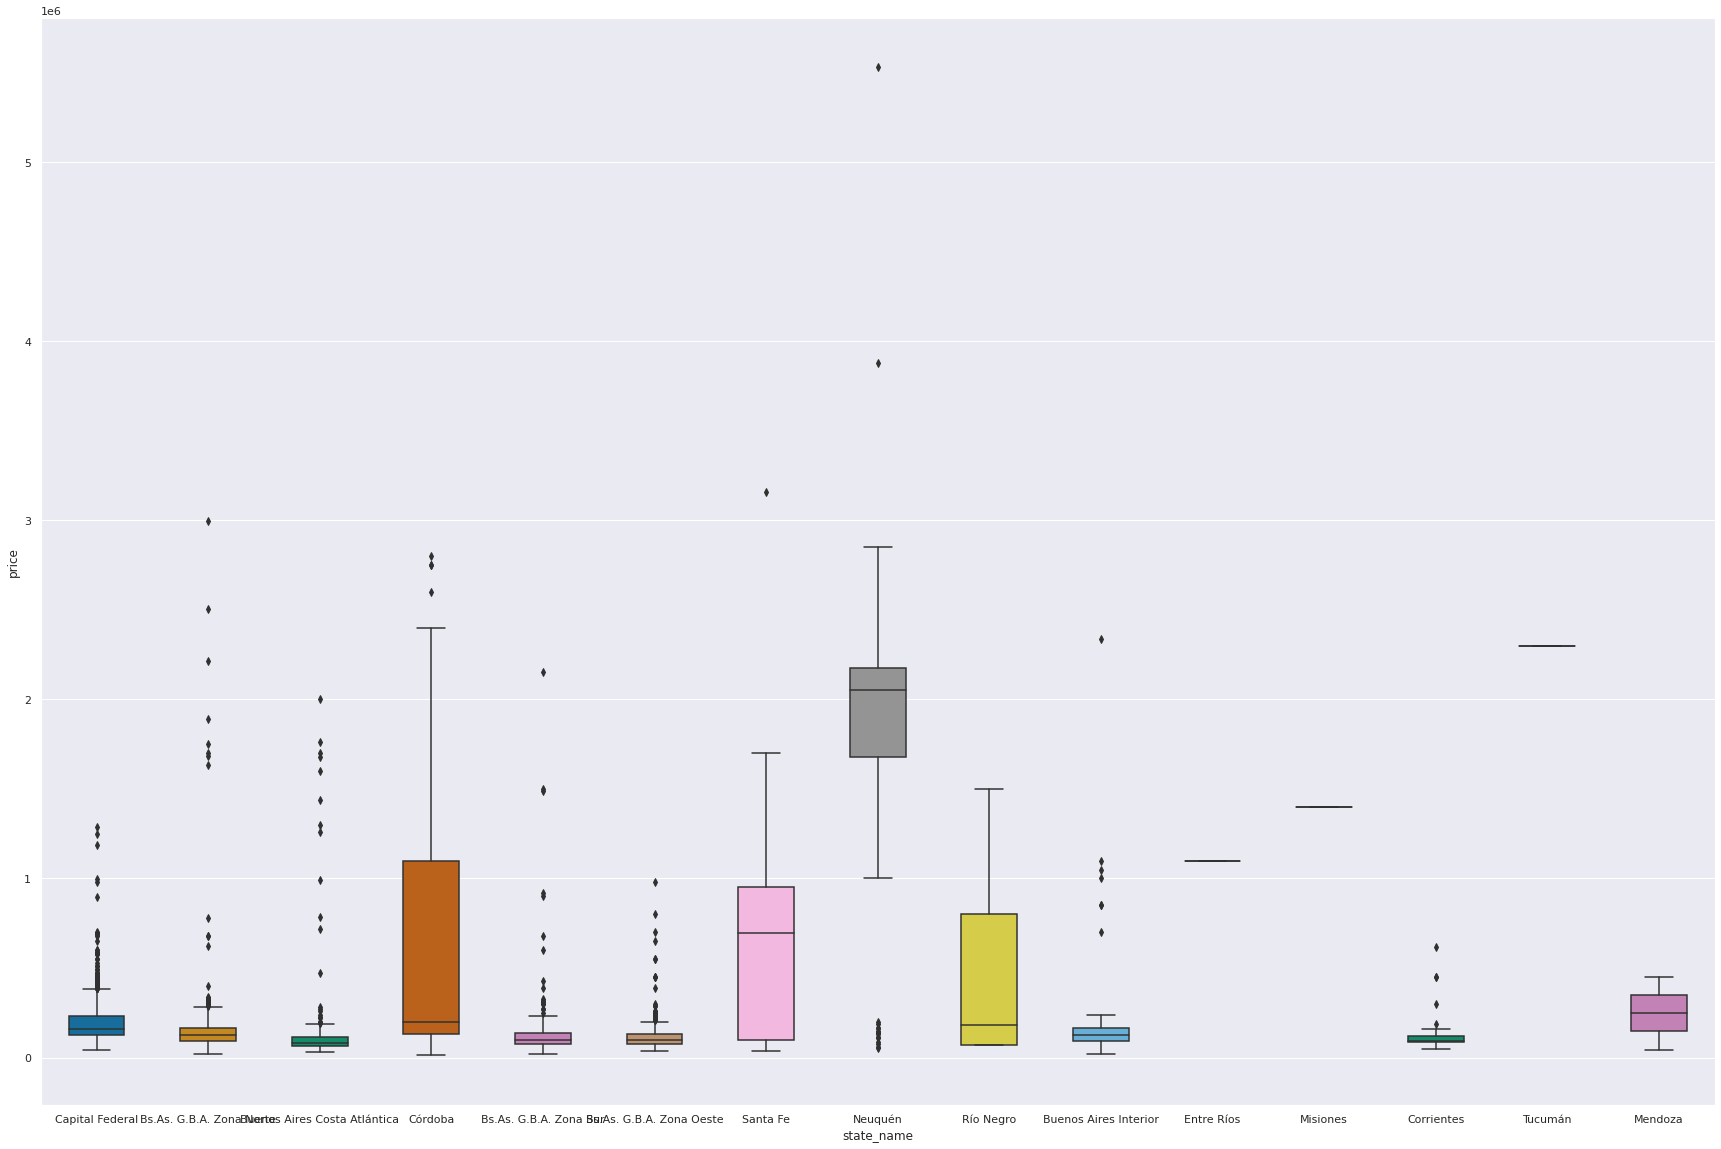

In [59]:
#genero boxplot por tipo de propiedad y por state_name para ver si también hay un comportamiento geografico por provincia (dado que las propiedades tambien varian de precio por la ubicacion)

sns.set(rc={"figure.figsize": (30, 20)})
bplot = sns.boxplot(y='price', x='state_name', 
                 data=data_ph, 
                 width=0.5,
                 palette="colorblind")



#aca puedo observar que 

In [60]:
# comienzo la limpieza de los outliers de precio de las propiedades que son ph:


mask = data_ph["state_name"]=='Neuquén'
data_ph_mask = data_ph[mask]
data_mask1 = (data_ph_mask["price"]<data_ph_mask.price.quantile(0.5) + 1.5*(data_ph_mask.price.quantile(0.75) - data_ph_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_ph_clean = data_ph.drop(data_mask1.iloc[data_mask2].index)


mask = data_ph["state_name"]=='Santa Fe'
data_ph_mask = data_ph[mask]
data_mask1 = (data_ph_mask["price"]<data_ph_mask.price.quantile(0.5) + 1.7*(data_ph_mask.price.quantile(0.75) - data_ph_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_ph_clean = data_ph_clean.drop(data_mask1.iloc[data_mask2].index)

mask = data_ph["state_name"]=='Corrientes'
data_ph_mask = data_ph[mask]
data_mask1 = (data_ph_mask["price"]<data_ph_mask.price.quantile(0.5) + 1.7*(data_ph_mask.price.quantile(0.75) - data_ph_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_ph_clean = data_ph_clean.drop(data_mask1.iloc[data_mask2].index)

mask = data_ph["state_name"]=='Capital Federal'
data_ph_mask = data_ph[mask]
data_mask1 = (data_ph_mask["price"]<data_ph_mask.price.quantile(0.5) + 1.7*(data_ph_mask.price.quantile(0.75) - data_ph_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_ph_clean = data_ph_clean.drop(data_mask1.iloc[data_mask2].index)

mask = data_ph["state_name"]=='Bs.As. G.B.A. Zona Norte'
data_ph_mask = data_ph[mask]
data_mask1 = (data_ph_mask["price"]<data_ph_mask.price.quantile(0.5) + 1.7*(data_ph_mask.price.quantile(0.75) - data_ph_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_ph_clean = data_ph_clean.drop(data_mask1.iloc[data_mask2].index)

mask = data_ph["state_name"]=='Bs.As. G.B.A. Zona Sur'
data_ph_mask = data_ph[mask]
data_mask1 = (data_ph_mask["price"]<data_ph_mask.price.quantile(0.5) + 1.7*(data_ph_mask.price.quantile(0.75) - data_ph_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_ph_clean = data_ph_clean.drop(data_mask1.iloc[data_mask2].index)

mask = data_ph["state_name"]=='Bs.As. G.B.A. Zona Oeste'
data_ph_mask = data_ph[mask]
data_mask1 = (data_ph_mask["price"]<data_ph_mask.price.quantile(0.5) + 1.7*(data_ph_mask.price.quantile(0.75) - data_ph_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_ph_clean = data_ph_clean.drop(data_mask1.iloc[data_mask2].index)

mask = data_ph["state_name"]=='Buenos Aires Costa Atlántica'
data_ph_mask = data_ph[mask]
data_mask1 = (data_ph_mask["price"]<data_ph_mask.price.quantile(0.5) + 1.7*(data_ph_mask.price.quantile(0.75) - data_ph_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_ph_clean = data_ph_clean.drop(data_mask1.iloc[data_mask2].index)



print(data_ph_clean.shape)
print(data_ph.shape)

(4488, 37)
(4834, 37)


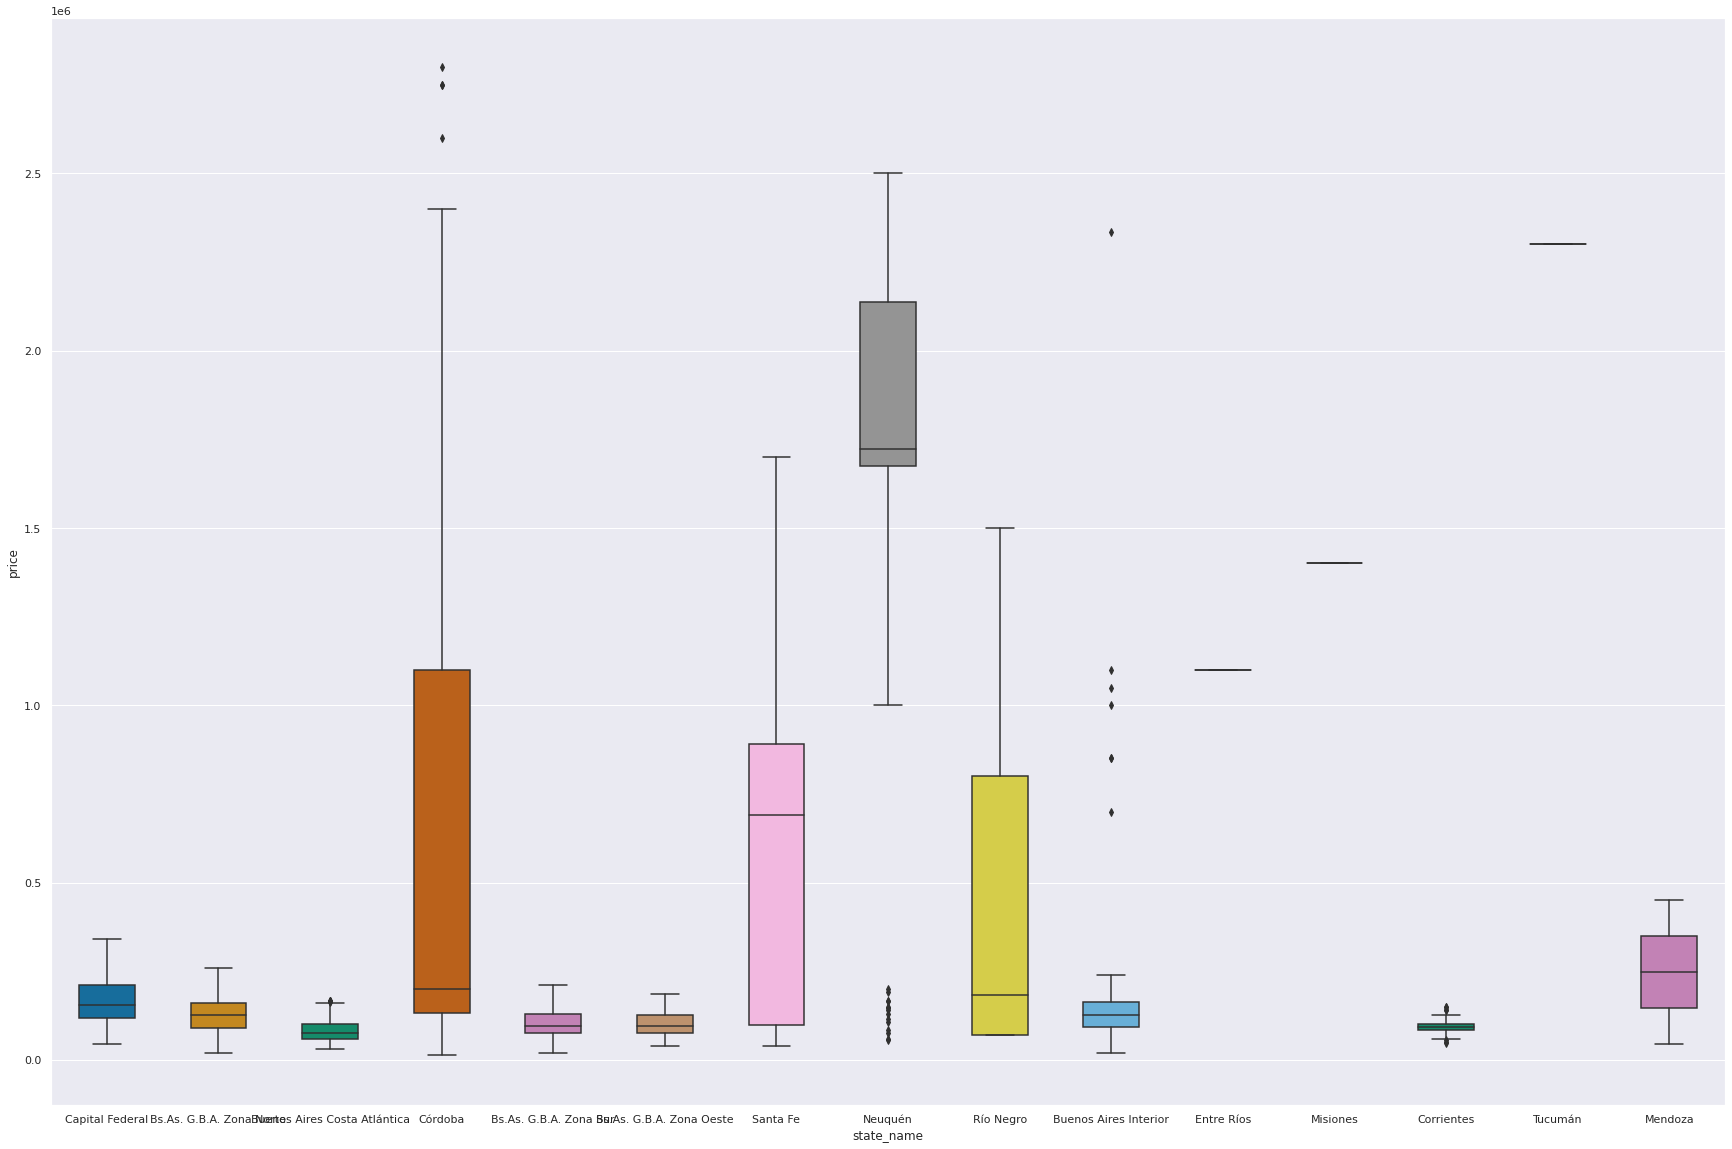

In [61]:
#chequeo como quedo con la limpieza de datos

sns.set(rc={"figure.figsize": (30, 20)})
bplot = sns.boxplot(y='price', x='state_name', 
                 data=data_ph_clean, 
                 width=0.5,
                 palette="colorblind")

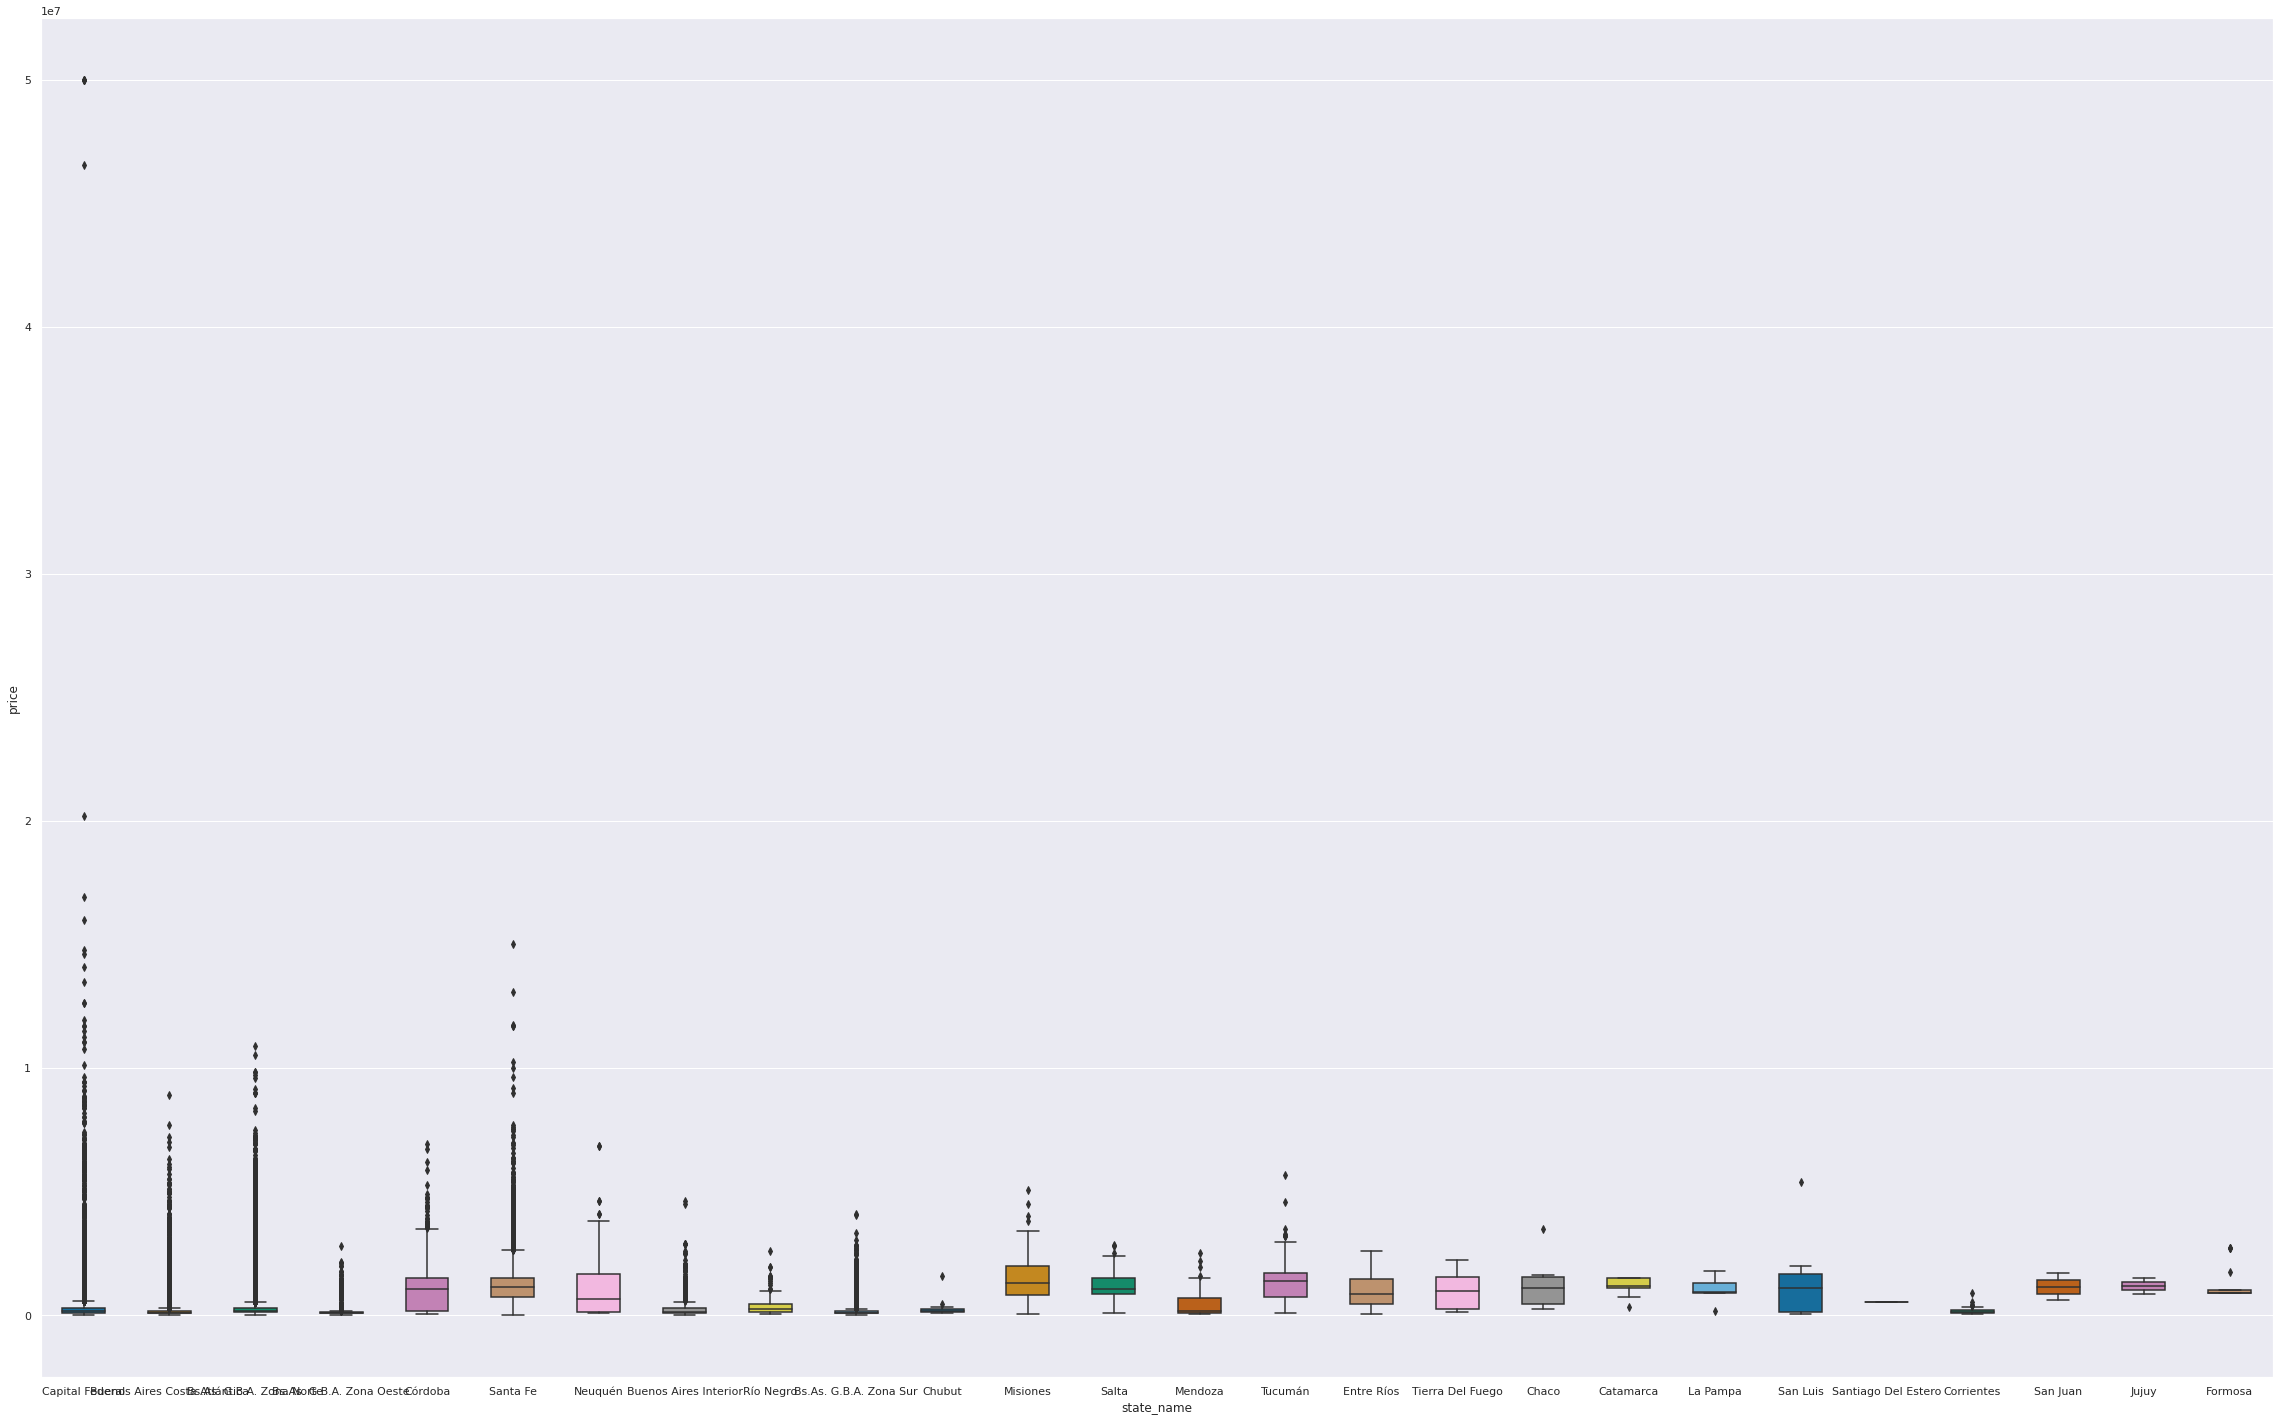

In [62]:
#genero boxplot por tipo de propiedad y por state_name para ver si también hay un comportamiento geografico por provincia 
#(dado que las propiedades tambien varian de precio por la ubicacion)

sns.set(rc={"figure.figsize": (40, 25)})
bplot = sns.boxplot(y='price', x='state_name', 
                 data=data_dpto, 
                 width=0.5,
                 palette="colorblind")

#aca puedo observar que 

In [63]:
# comienzo la limpieza de los outliers de precio de las propiedades que son deptos:


mask = data_dpto["state_name"]=='Capital Federal'
data_dpto_mask = data_dpto[mask]
data_mask1 = (data_dpto_mask["price"]<data_dpto_mask.price.quantile(0.5) + 15*(data_dpto_mask.price.quantile(0.75) - data_dpto_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_dpto_clean = data_dpto.drop(data_mask1.iloc[data_mask2].index)

mask = data_dpto["state_name"]=='Bs.As. G.B.A. Zona Norte'
data_dpto_mask = data_dpto[mask]
data_mask1 = (data_dpto_mask["price"]<data_dpto_mask.price.quantile(0.5) + 10*(data_dpto_mask.price.quantile(0.75) - data_dpto_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_dpto_clean = data_dpto_clean.drop(data_mask1.iloc[data_mask2].index)

mask = data_dpto["state_name"]=='Bs.As. G.B.A. Zona Sur'
data_dpto_mask = data_dpto[mask]
data_mask1 = (data_dpto_mask["price"]<data_dpto_mask.price.quantile(0.5) + 10*(data_dpto_mask.price.quantile(0.75) - data_dpto_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_dpto_clean = data_dpto_clean.drop(data_mask1.iloc[data_mask2].index)

mask = data_dpto["state_name"]=='Buenos Aires Costa Atlántica'
data_dpto_mask = data_dpto[mask]
data_mask1 = (data_dpto_mask["price"]<data_dpto_mask.price.quantile(0.5) + 10*(data_dpto_mask.price.quantile(0.75) - data_dpto_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_dpto_clean = data_dpto_clean.drop(data_mask1.iloc[data_mask2].index)

mask = data_dpto["state_name"]=='Bs.As. G.B.A. Zona Oeste'
data_dpto_mask = data_dpto[mask]
data_mask1 = (data_dpto_mask["price"]<data_dpto_mask.price.quantile(0.5) + 10*(data_dpto_mask.price.quantile(0.75) - data_dpto_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_dpto_clean = data_dpto_clean.drop(data_mask1.iloc[data_mask2].index)

mask = data_dpto["state_name"]=='Santa Fe'
data_dpto_mask = data_dpto[mask]
data_mask1 = (data_dpto_mask["price"]<data_dpto_mask.price.quantile(0.5) + 5*(data_dpto_mask.price.quantile(0.75) - data_dpto_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_dpto_clean = data_dpto_clean.drop(data_mask1.iloc[data_mask2].index)

mask = data_dpto["state_name"]=='Córdoba'
data_dpto_mask = data_dpto[mask]
data_mask1 = (data_dpto_mask["price"]<data_dpto_mask.price.quantile(0.5) + 4*(data_dpto_mask.price.quantile(0.75) - data_dpto_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_dpto_clean = data_dpto_clean.drop(data_mask1.iloc[data_mask2].index)

mask = data_dpto["state_name"]=='Buenos Aires Interior'
data_dpto_mask = data_dpto[mask]
data_mask1 = (data_dpto_mask["price"]<data_dpto_mask.price.quantile(0.5) + 5*(data_dpto_mask.price.quantile(0.75) - data_dpto_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_dpto_clean = data_dpto_clean.drop(data_mask1.iloc[data_mask2].index)

mask = data_dpto["state_name"]=='Misiones'
data_dpto_mask = data_dpto[mask]
data_mask1 = (data_dpto_mask["price"]<data_dpto_mask.price.quantile(0.5) + 5*(data_dpto_mask.price.quantile(0.75) - data_dpto_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_dpto_clean = data_dpto_clean.drop(data_mask1.iloc[data_mask2].index)

mask = data_dpto["state_name"]=='Tucumán'
data_dpto_mask = data_dpto[mask]
data_mask1 = (data_dpto_mask["price"]<data_dpto_mask.price.quantile(0.5) + 5*(data_dpto_mask.price.quantile(0.75) - data_dpto_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_dpto_clean = data_dpto_clean.drop(data_mask1.iloc[data_mask2].index)

mask = data_dpto["state_name"]=='San Luis'
data_dpto_mask = data_dpto[mask]
data_mask1 = (data_dpto_mask["price"]<data_dpto_mask.price.quantile(0.5) + 2*(data_dpto_mask.price.quantile(0.75) - data_dpto_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_dpto_clean = data_dpto_clean.drop(data_mask1.iloc[data_mask2].index)

mask = data_dpto["state_name"]=='Neuquén'
data_dpto_mask = data_dpto[mask]
data_mask1 = (data_dpto_mask["price"]<data_dpto_mask.price.quantile(0.5) + 2*(data_dpto_mask.price.quantile(0.75) - data_dpto_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_dpto_clean = data_dpto_clean.drop(data_mask1.iloc[data_mask2].index)



print(data_dpto_clean.shape)
print(data_dpto.shape)

(54275, 37)
(56997, 37)


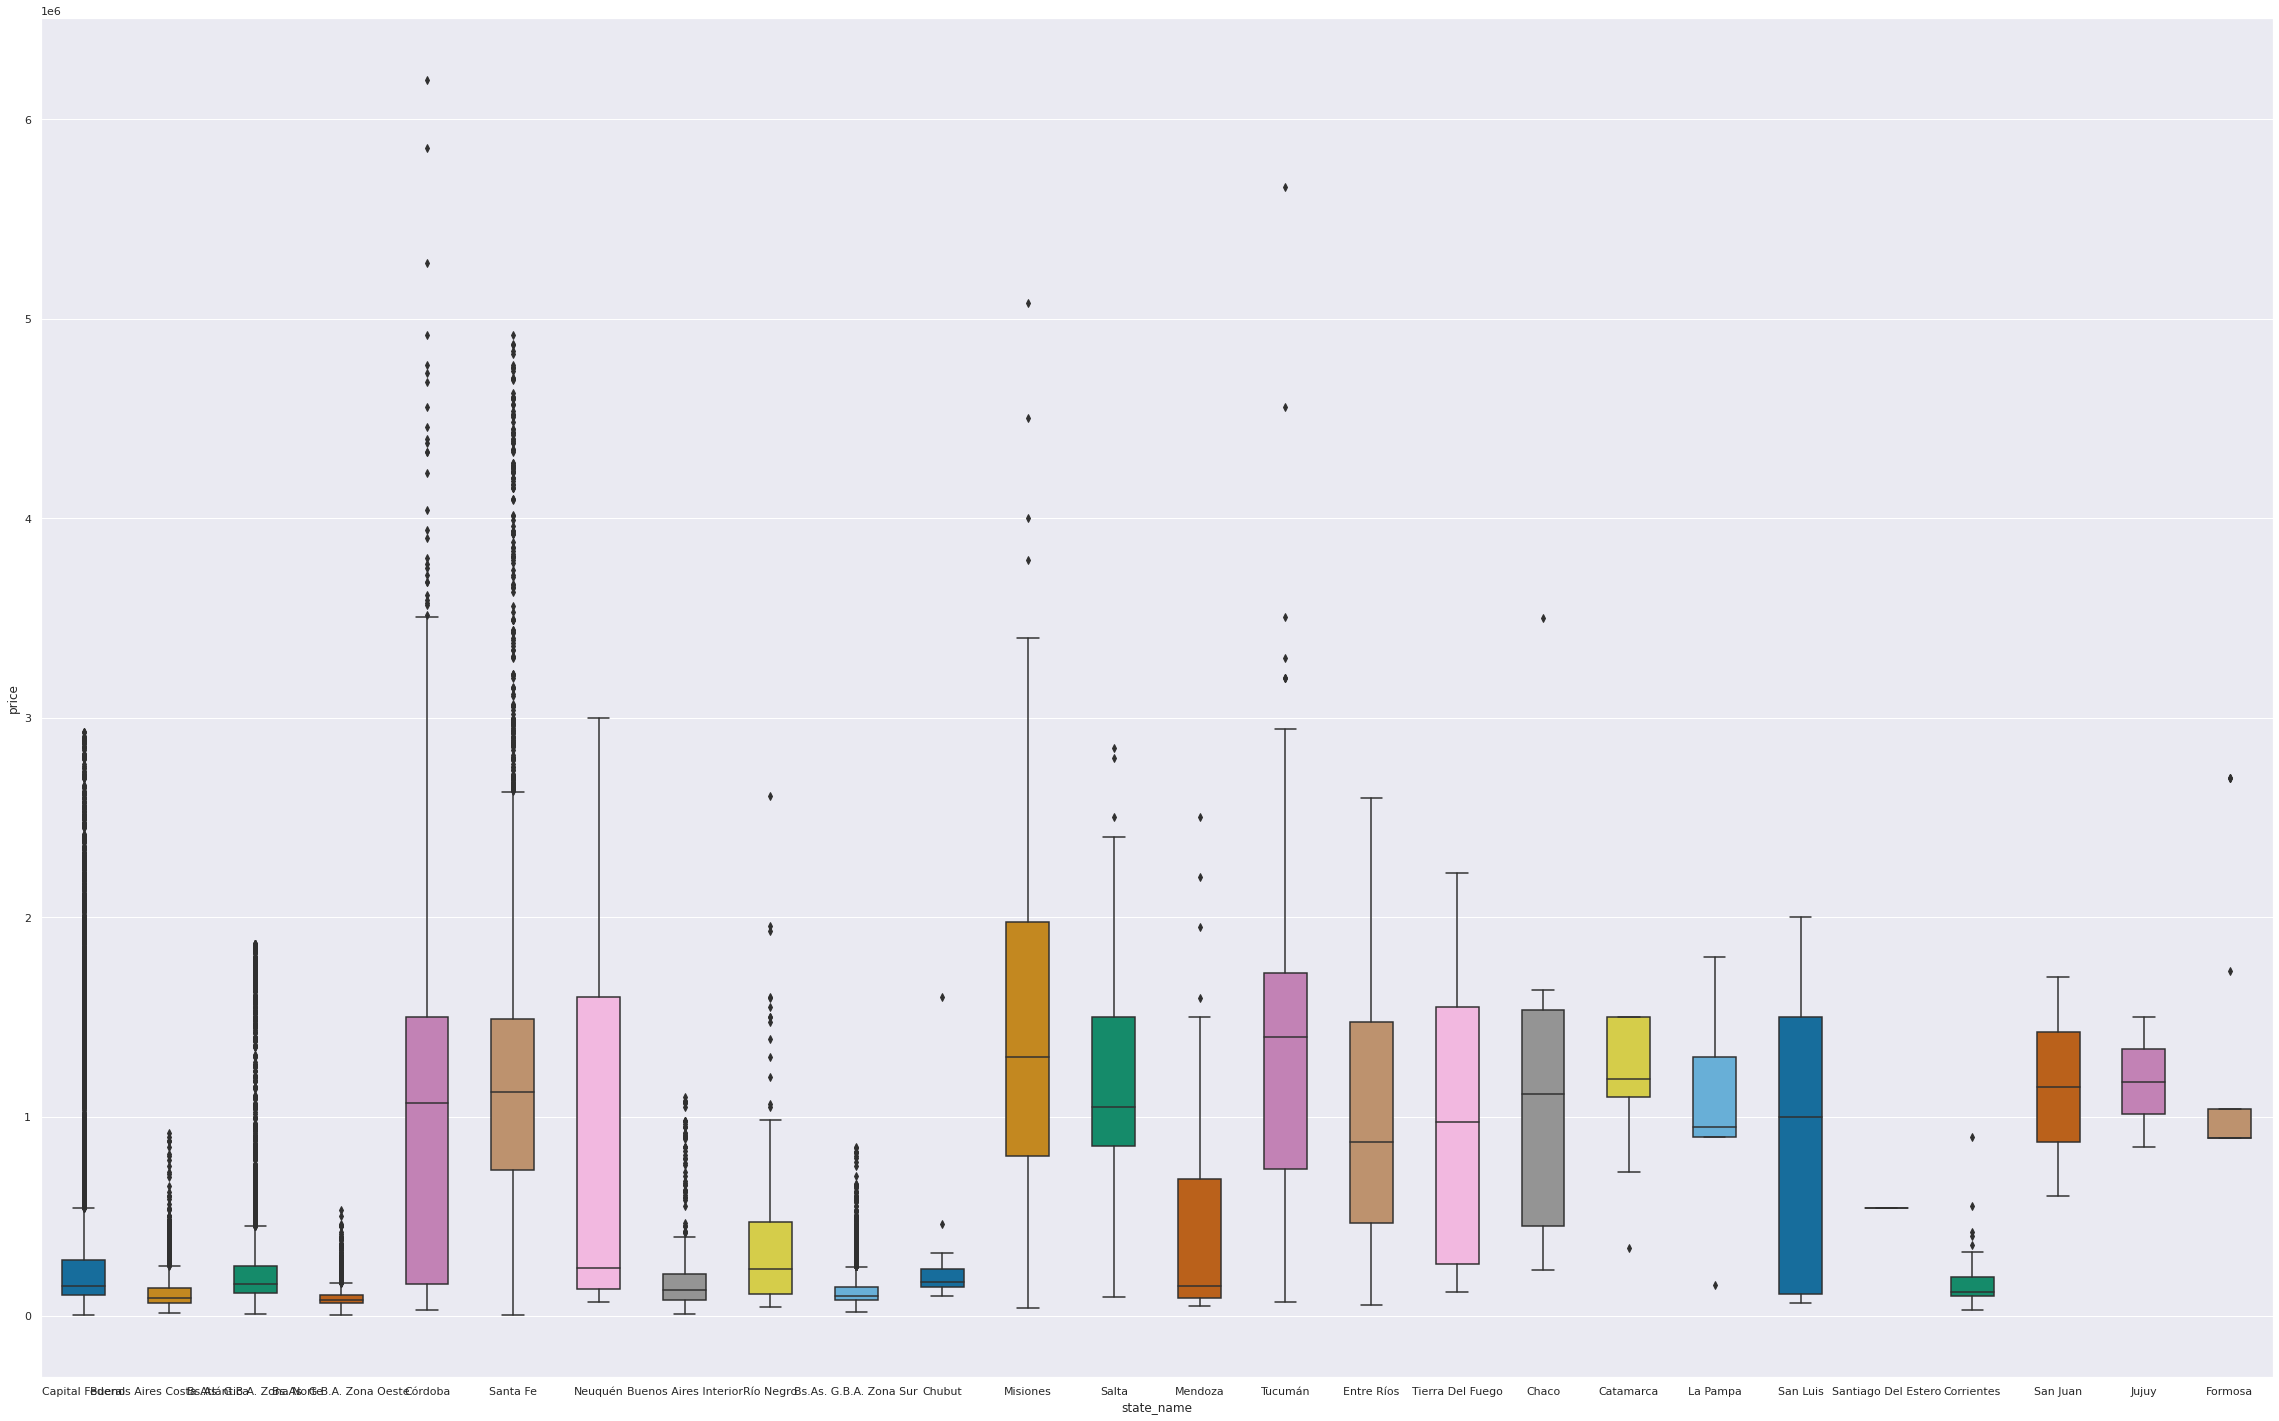

In [64]:
#genero boxplot por tipo de propiedad y por state_name para ver si también hay un comportamiento geografico por provincia 
#(dado que las propiedades tambien varian de precio por la ubicacion)

sns.set(rc={"figure.figsize": (40, 25)})
bplot = sns.boxplot(y='price', x='state_name', 
                 data=data_dpto_clean, 
                 width=0.5,
                 palette="colorblind")

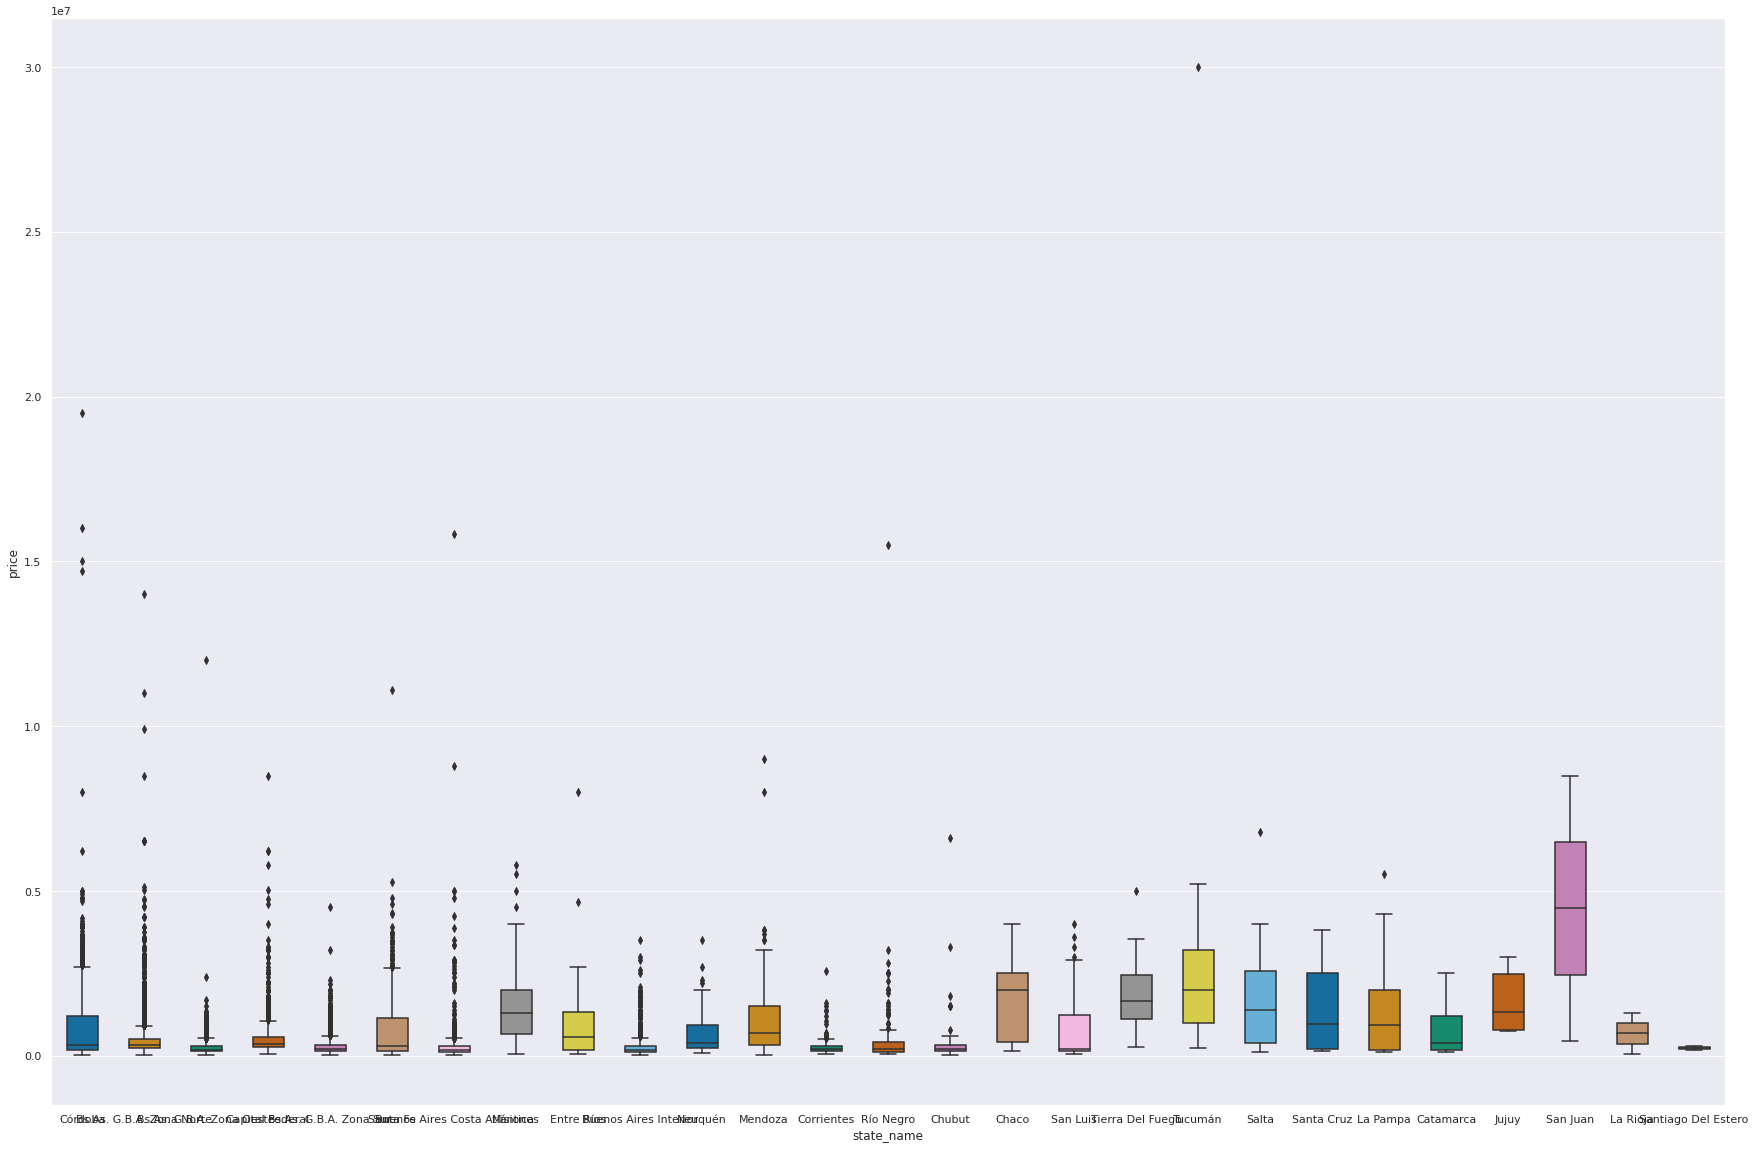

In [65]:
#genero boxplot por tipo de propiedad y por state_name para ver si también hay un comportamiento geografico por provincia (dado que las propiedades tambien varian de precio por la ubicacion)

sns.set(rc={"figure.figsize": (30, 20)})
bplot = sns.boxplot(y='price', x='state_name', 
                 data=data_house, 
                 width=0.5,
                 palette="colorblind")

#aca puedo observar que 

In [66]:
mask = data_house["state_name"]=='Mendoza'
data_house_mask = data_house[mask]
data_mask1 = (data_house_mask["price"]<data_house_mask.price.quantile(0.5) + 5*(data_house_mask.price.quantile(0.75) - data_house_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_house_clean = data_house.drop(data_mask1.iloc[data_mask2].index)

mask = data_house["state_name"]=='Córdoba'
data_house_mask = data_house[mask]
data_mask1 = (data_house_mask["price"]<data_house_mask.price.quantile(0.5) + 5*(data_house_mask.price.quantile(0.75) - data_house_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_house_clean = data_house_clean.drop(data_mask1.iloc[data_mask2].index)

mask = data_house["state_name"]=='Tucumán'
data_house_mask = data_house[mask]
data_mask1 = (data_house_mask["price"]<data_house_mask.price.quantile(0.5) + 15*(data_house_mask.price.quantile(0.75) - data_house_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_house_clean = data_house_clean.drop(data_mask1.iloc[data_mask2].index)

mask = data_house["state_name"]=='Salta'
data_house_mask = data_house[mask]
data_mask1 = (data_house_mask["price"]<data_house_mask.price.quantile(0.5) + 5*(data_house_mask.price.quantile(0.75) - data_house_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_house_clean = data_house_clean.drop(data_mask1.iloc[data_mask2].index)

mask = data_house["state_name"]=='Buenos Aires Costa Atlántica'
data_house_mask = data_house[mask]
data_mask1 = (data_house_mask["price"]<data_house_mask.price.quantile(0.5) + 10*(data_house_mask.price.quantile(0.75) - data_house_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_house_clean = data_house_clean.drop(data_mask1.iloc[data_mask2].index)

mask = data_house["state_name"]=='Capital Federal'
data_house_mask = data_house[mask]
data_mask1 = (data_house_mask["price"]<data_house_mask.price.quantile(0.5) + 5*(data_house_mask.price.quantile(0.75) - data_house_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_house_clean = data_house_clean.drop(data_mask1.iloc[data_mask2].index)

mask = data_house["state_name"]=='Bs.As. G.B.A. Zona Norte'
data_house_mask = data_house[mask]
data_mask1 = (data_house_mask["price"]<data_house_mask.price.quantile(0.5) + 10*(data_house_mask.price.quantile(0.75) - data_house_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_house_clean = data_house_clean.drop(data_mask1.iloc[data_mask2].index)

print(data_house_clean.shape)
print(data_house.shape)

(31545, 37)
(32235, 37)


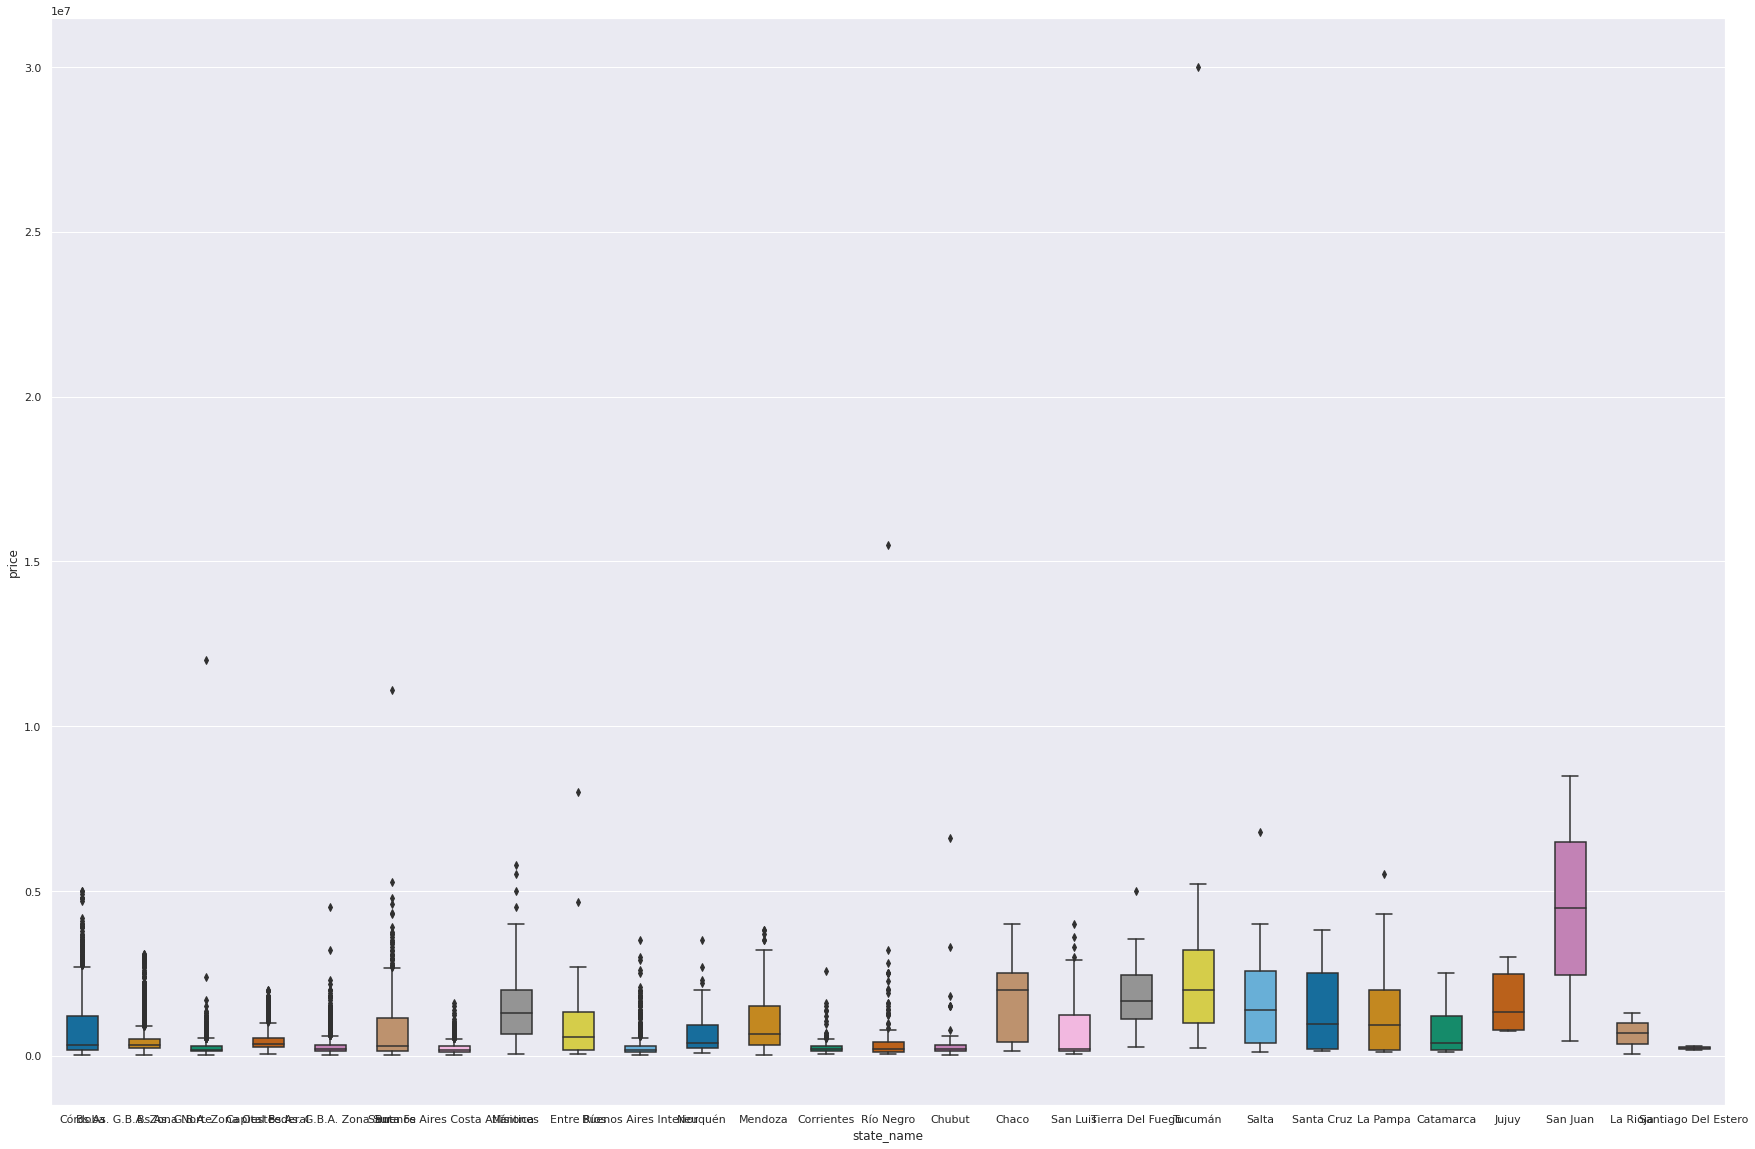

In [67]:
#genero boxplot por tipo de propiedad y por state_name para ver si 
#también hay un comportamiento geografico por provincia (dado que las propiedades tambien varian de precio por la ubicacion)

sns.set(rc={"figure.figsize": (30, 20)})
bplot = sns.boxplot(y='price', x='state_name', 
                 data=data_house_clean, 
                 width=0.5,
                 palette="colorblind")

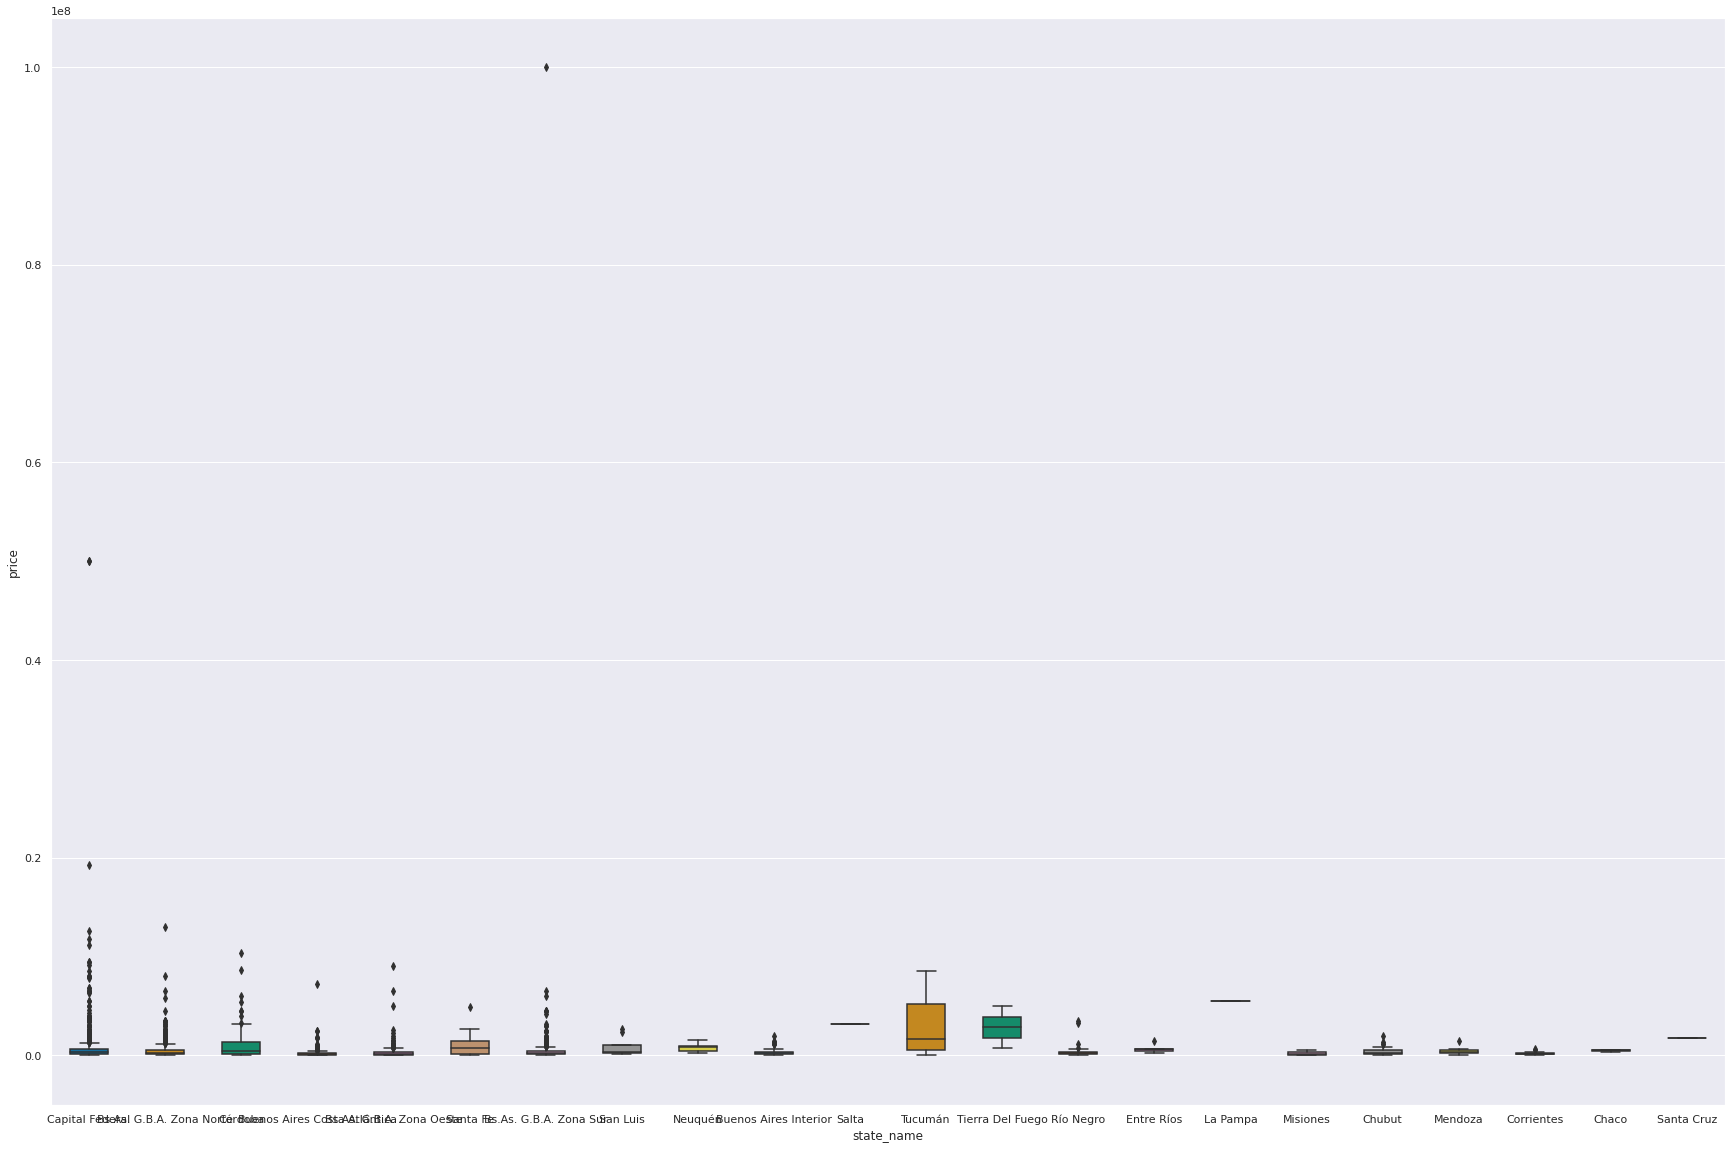

In [68]:
#genero boxplot por tipo de propiedad y por state_name para ver si también hay un comportamiento geografico por provincia (dado que las propiedades tambien varian de precio por la ubicacion)

sns.set(rc={"figure.figsize": (30, 20)})
bplot = sns.boxplot(y='price', x='state_name', 
                 data=data_store, 
                 width=0.5,
                 palette="colorblind")

In [69]:
#limpio los datos de acuerdo a cada zona geografica y tipo de propiedad


mask = data_store["state_name"]=='Bs.As. G.B.A. Zona Sur'
data_store_mask = data_store[mask]
data_mask1 = (data_store_mask["price"]<data_store_mask.price.quantile(0.5) + 15*(data_store_mask.price.quantile(0.75) - data_store_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_store_clean = data_store.drop(data_mask1.iloc[data_mask2].index)

mask = data_store["state_name"]=='Capital Federal'
data_store_mask = data_store[mask]
data_mask1 = (data_store_mask["price"]<data_store_mask.price.quantile(0.5) + 15*(data_store_mask.price.quantile(0.75) - data_store_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_store_clean = data_store_clean.drop(data_mask1.iloc[data_mask2].index)

mask = data_store["state_name"]=='Bs.As. G.B.A. Zona Norte'
data_store_mask = data_store[mask]
data_mask1 = (data_store_mask["price"]<data_store_mask.price.quantile(0.5) + 15*(data_store_mask.price.quantile(0.75) - data_store_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_store_clean = data_store_clean.drop(data_mask1.iloc[data_mask2].index)

mask = data_store["state_name"]=='Córdoba'
data_store_mask = data_store[mask]
data_mask1 = (data_store_mask["price"]<data_store_mask.price.quantile(0.5) + 10*(data_store_mask.price.quantile(0.75) - data_store_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_store_clean = data_store_clean.drop(data_mask1.iloc[data_mask2].index)

mask = data_store["state_name"]=='Buenos Aires Costa Atlántica'
data_store_mask = data_store[mask]
data_mask1 = (data_store_mask["price"]<data_store_mask.price.quantile(0.5) + 15*(data_store_mask.price.quantile(0.75) - data_store_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_store_clean = data_store_clean.drop(data_mask1.iloc[data_mask2].index)

mask = data_store["state_name"]=='Bs.As. G.B.A. Zona Oeste'
data_store_mask = data_store[mask]
data_mask1 = (data_store_mask["price"]<data_store_mask.price.quantile(0.5) + 15*(data_store_mask.price.quantile(0.75) - data_store_mask.price.quantile(0.25)))
data_mask2 = np.where(data_mask1.iloc[:]==False)
data_store_clean = data_store_clean.drop(data_mask1.iloc[data_mask2].index)

print(data_store_clean.shape)
print(data_store.shape)

(3030, 37)
(3099, 37)


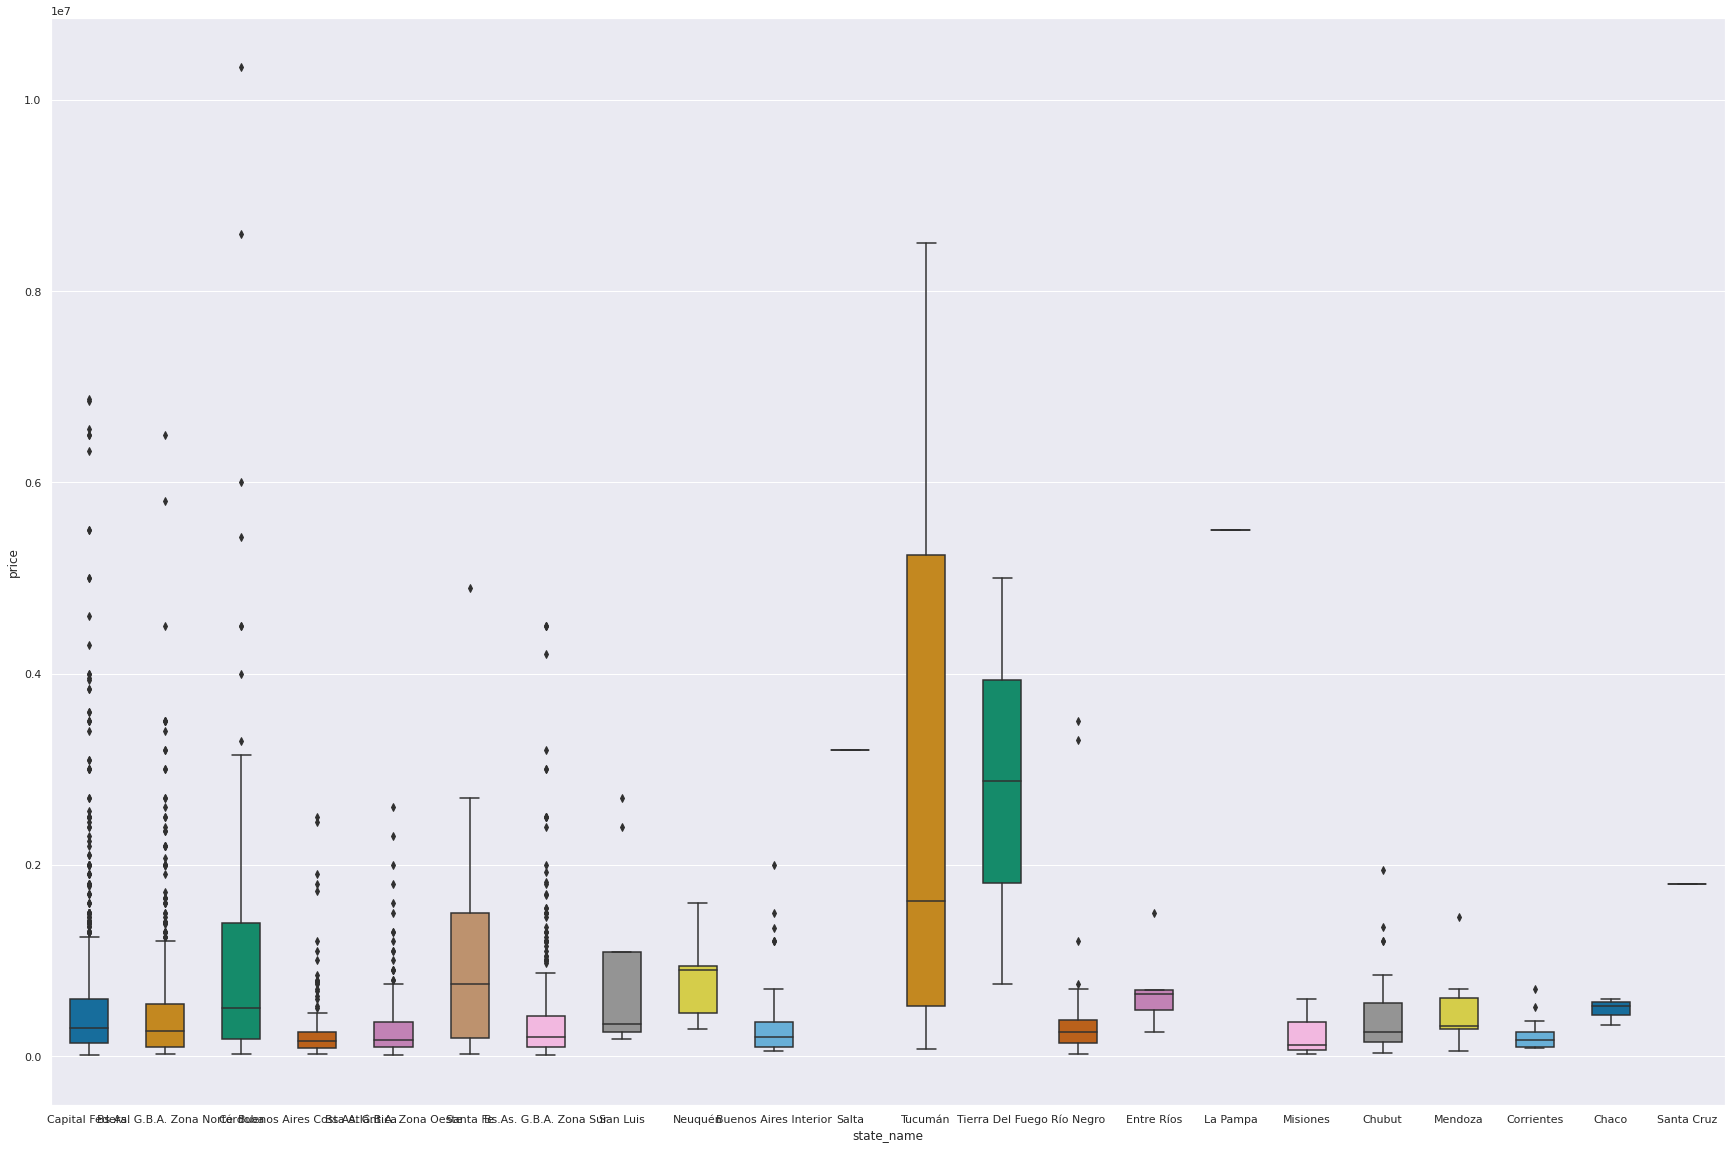

In [70]:
sns.set(rc={"figure.figsize": (30, 20)})
bplot = sns.boxplot(y='price', x='state_name', 
                 data=data_store_clean, 
                 width=0.5,
                 palette="colorblind")

In [71]:
#anexo los datasets para generar el dataset final limpio de outliers en la variable precio

# data_dpto_clean
# data_store_clean
# data_house_clean
# data_ph_clean

df1 =data_dpto_clean
df2 =data_ph_clean
df3 = data_house_clean
df4 = data_store_clean


data = pd.concat([df1, df2, df3, df4])

data.shape

data.head(5)

# data = data_dpto_clean.append(data_store_clean, data_house_clean, data_ph_clean)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title,price_usd_clean,price_clean,currency_clean,price_local_currency_clean,surface_total_in_m2_clean,surface_covered_in_m2_clean,surface_total_in_m2_regex,surface_covered_in_m2_regex,rooms_regex,ambientes,ambientes_regex,clean_floor,price_usd_per_m2_clean,price_per_m2_clean
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,72000.0,72000.0,USD,1270404.0,55.0,55.0,NaN,NaN,1.0,2.0,2.0,3,1309.090909,1309.090909
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,64000.0,64000.0,USD,1129248.0,35.0,35.0,NaN,NaN,1.0,2.0,2.0,NaN,1828.571429,1828.571429
7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,USD,2434941.0,138000.0,45.0,40.0,3066.666667,3450.000000,NaN,NaN,NaN,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,138000.0,138000.0,USD,2434941.0,45.0,40.0,NaN,NaN,0.0,1.0,1.0,NaN,3066.666667,3066.666667
8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,195000.0,USD,3440677.5,195000.0,65.0,60.0,3000.000000,3250.000000,NaN,NaN,NaN,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",195000.0,195000.0,USD,3440677.5,65.0,60.0,NaN,NaN,1.0,2.0,2.0,NaN,3000.000000,3000.000000
12,sell,apartment,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3430813.0,"-34.4860195,-58.5038139",-34.486019,-58.503814,115000.0,USD,2029117.5,115000.0,39.0,36.0,2948.717949,3194.444444,NaN,NaN,NaN,EXCELENTE DEPARTAMENTO 2 AMBIENTES CONTRAFRENT...,EXCELENTE DEPARTAMENTO 2 AMBIENTES CONTRAFRENT...,115000.0,115000.0,USD,2029117.5,39.0,36.0,NaN,NaN,1.0,2.0,2.0,NaN,2948.717949,2948.717949


<a id="section_elim_dup"></a> 
## 4. Eliminacion de Duplicados
Consideramos duplicados aquellos registros que coincidan en los campos:
  * property_type
  * place_name
  * place_with_parent_names
  * state_name 
  * surface_total_in_m2_clean
  * surface_total_in_m2_clean
  * title (transformado)

[volver a TOC](#section_toc)

In [72]:
# transformo el campo titulo 
title2=data['title'].str.upper()
title2.replace(to_replace=r'\s+', value='', regex=True,inplace=True)
title2.replace(to_replace=r'[^\w\s]', value='', regex=True,inplace=True)

data.loc[title2.notnull(),'title2'] = title2

duplicados = ['property_type', 'place_name' ,'place_with_parent_names','state_name',
              'surface_total_in_m2','surface_total_in_m2', 'title2']
              
data[duplicados].duplicated().sum()

17377

In [73]:
data['largo_description'] = data['description'].apply(lambda x:len(str(x))) #me cuenta que tan largo es
data = data.sort_values(by = ['largo_description'], ascending = False)      #me lo ordena de menor a mayor
data = data.drop_duplicates(subset = duplicados, keep = 'first')
display (data.shape)

(75961, 39)

<a id="section_varnuevas"></a>
## 5. Nuevos Campos 


[5.1. Seguridad](#section_seguridad)

[5.2. Jardin](#section_jardin)

[5.3. A Estrenar](#section_estrenar)

[5.4. Balcon](#section_balcon)

[5.5. Terraza](#section_terraza)

[5.6. Parrilla](#section_parrilla)

[5.7. Pileta](#section_pileta)

[5.8. Cochera](#section_cochera)

[5.9. Dummies para tipo de lugar](#section_dummies_place_type)

[5.10. Provincia, ciudad, partido y barrio](#section_places)

[volver a TOC](#section_toc)


Funciones graficos:


In [74]:
# genero regex en cada nuevo campo para poder calcular la cantidad que hay de cada valor y 
# asi utilizarlo en las funciones que cree (pie, barritas y division_precio )

In [75]:
def pie (valor):
    chart_pie = pd.DataFrame (data [valor].value_counts ())
    chart_pie[valor + " (%)"] = round (pd.DataFrame (data[valor].value_counts())/data[valor].shape [0]*100,2)
       
    
    f, (ax1) = plt.subplots (1)
    f.set_figwidth (12)
    f.set_figheight (4.5)
    
    ax1.pie (chart_pie [valor], labels = chart_pie.index, autopct = '%1.1f%%', shadow = True)

    return

In [76]:
def barritas (valor):

    chart_barritas = (data.groupby ('property_type')[valor].sum ()/ data.groupby ('property_type') [valor].count())*100
    chart_barritas = pd.DataFrame (round (chart_barritas, 2))
    chart_barritas = chart_barritas.reset_index ()

    f, (ax1) = plt.subplots (1)
    f.set_figwidth (12)
    f.set_figheight (4.5)

    sns.barplot (x = 'property_type', y = valor, data = chart_barritas, ax = ax1)
   
    return

In [77]:
data ['división_datos_precio'] = pd.qcut(data ['price_clean'],15, labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]) 
def division_precio (valor):
    
    chart_division = (data.groupby ('división_datos_precio')[valor].sum ()/ data.groupby ('división_datos_precio') [valor].count())*100
    chart_division = pd.DataFrame (round (chart_division, 2))
    chart_division = chart_division.reset_index ()
    
    f, (ax1) = plt.subplots (1)
    f.set_figwidth (12)
    f.set_figheight (4.5)
    
    sns.barplot (x = 'división_datos_precio', y = valor, data = chart_division, color = "#009966", ax = ax1)
   
    return

  <a id="section_seguridad"></a> 

**5.1. Seguridad**: utilizamos regexs para extraer el dato de las columnas titulo y descripcion

[volver a TOC](#section_toc)

In [78]:
# Creo el campo seguridad
pattern_seguridad = "(?P<seg>seguridad|vigilancia|barrio cerrado|country|barrio privado)"

pattern_seguridad_regex = re.compile(pattern_seguridad,flags = re.IGNORECASE) #Perform case-insensitive matching

rdo_desc = desc_series.apply(lambda x: x if x is np.NaN else pattern_seguridad_regex.search(x))
rdo_title = title_series.apply(lambda x: x if x is np.NaN else pattern_seguridad_regex.search(x))

data.loc[rdo_desc.notnull(),'seguridad'] = 1
data.loc[rdo_title.notnull(),'seguridad'] = 1
data['seguridad'].fillna(0,inplace=True)
data['seguridad'].value_counts()

0.0    65460
1.0    10501
Name: seguridad, dtype: int64

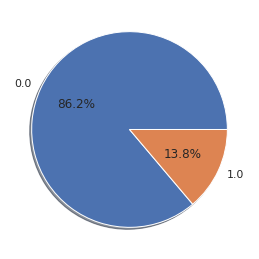

In [79]:
pie ('seguridad') 

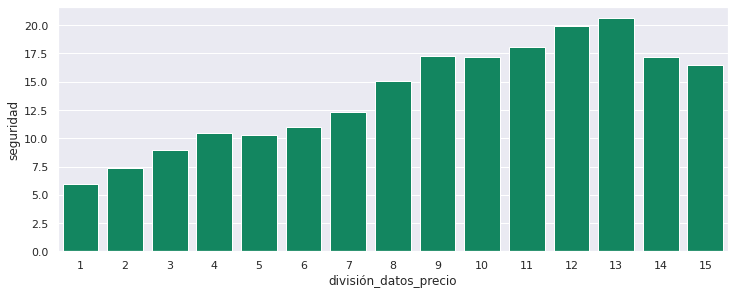

In [80]:
division_precio ('seguridad')

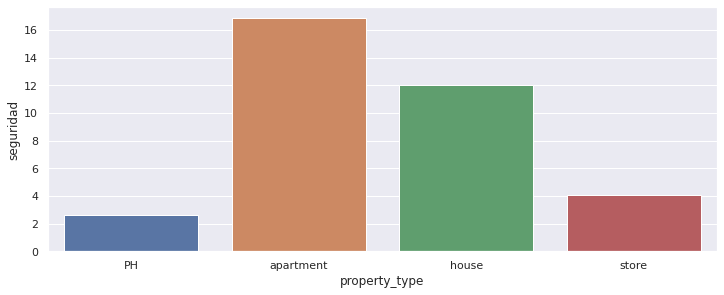

In [81]:
barritas ('seguridad')

<AxesSubplot:xlabel='price_clean', ylabel='state_name'>

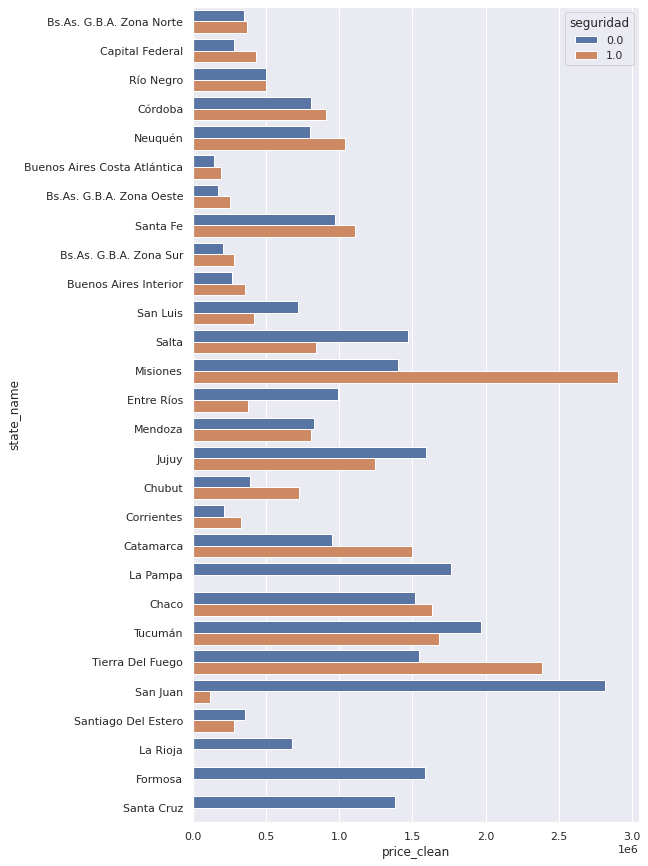

In [82]:
plt.figure(figsize =(8, 15))
sns.barplot(y = 'state_name', x = 'price_clean', hue = 'seguridad', data = data,  ci = None)

  <a id="section_jardin"></a> 

**5.2. Jardin**: utilizamos regexs para extraer el dato de las columnas titulo y descripcion

[volver a TOC](#section_toc)

In [83]:
# Creo el campo jardin
pattern_jardin = "(?P<jardin>jardin|parque|patio)"

pattern_jardin_regex = re.compile(pattern_jardin,flags = re.IGNORECASE) #Perform case-insensitive matching

rdo_desc = desc_series.apply(lambda x: x if x is np.NaN else pattern_jardin_regex.search(x))
rdo_title = title_series.apply(lambda x: x if x is np.NaN else pattern_jardin_regex.search(x))

data.loc[rdo_desc.notnull(),'jardin'] = 1
data.loc[rdo_title.notnull(),'jardin'] = 1
data['jardin'].fillna(0,inplace=True)
data['jardin'].value_counts()

0.0    47503
1.0    28458
Name: jardin, dtype: int64

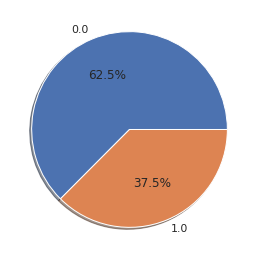

In [84]:
pie ('jardin') 

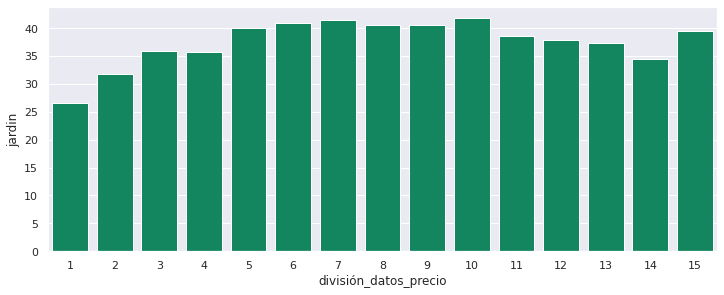

In [85]:
division_precio ('jardin')

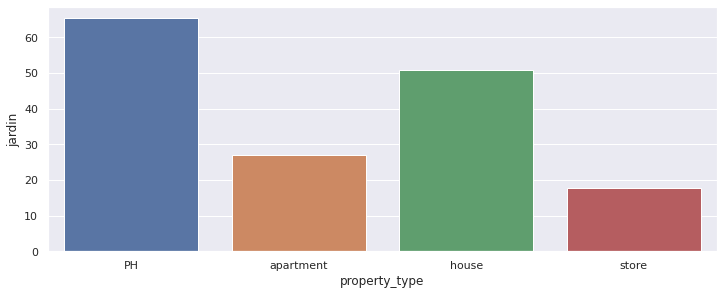

In [86]:
barritas ('jardin')

<AxesSubplot:xlabel='price_clean', ylabel='state_name'>

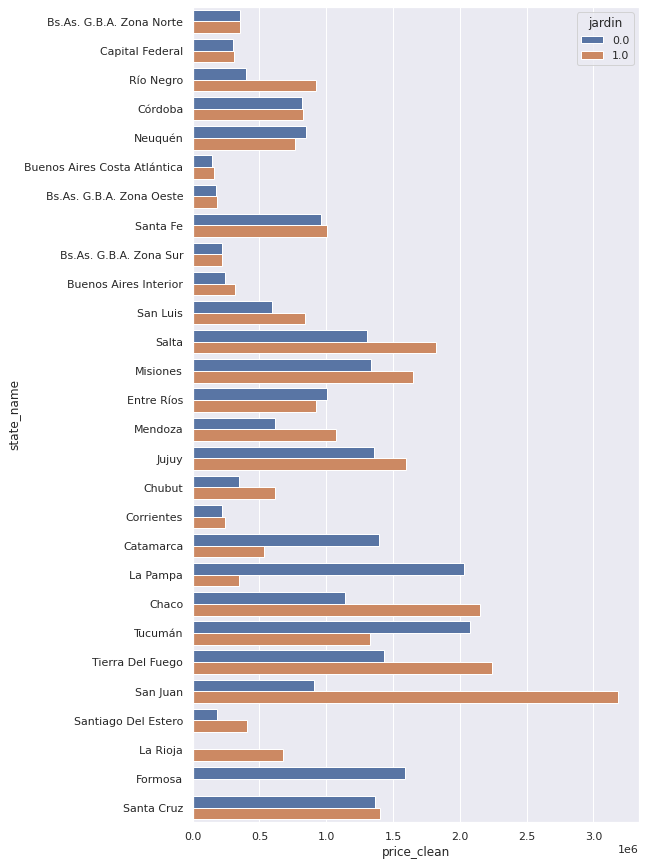

In [87]:
plt.figure(figsize =(8, 15))
sns.barplot(y = 'state_name', x = 'price_clean', hue = 'jardin', data = data, ci=None)

  <a id="section_estrenar"></a> 

**5.3. A estrenar**: utilizamos regexs para extraer el dato de las columnas titulo y descripcion

[volver a TOC](#section_toc)

In [88]:
# Creo el campo a_estrenar
pattern_estrenar = "(?P<estrenar>estrenar)"

pattern_estrenar_regex = re.compile(pattern_estrenar,flags = re.IGNORECASE) #Perform case-insensitive matching

rdo_desc = desc_series.apply(lambda x: x if x is np.NaN else pattern_estrenar_regex.search(x))
rdo_title = title_series.apply(lambda x: x if x is np.NaN else pattern_estrenar_regex.search(x))

data.loc[rdo_desc.notnull(),'a_estrenar'] = 1
data.loc[rdo_title.notnull(),'a_estrenar'] = 1
data['a_estrenar'].fillna(0,inplace=True)
data['a_estrenar'].value_counts()

0.0    67409
1.0     8552
Name: a_estrenar, dtype: int64

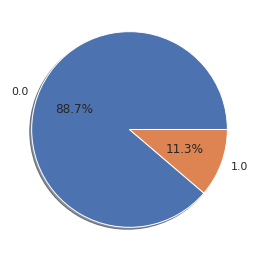

In [89]:
pie ('a_estrenar')

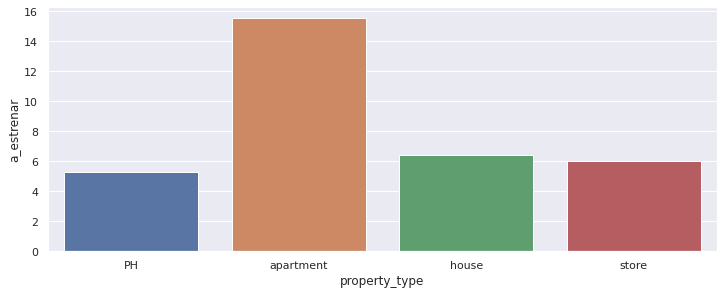

In [90]:
barritas ('a_estrenar')

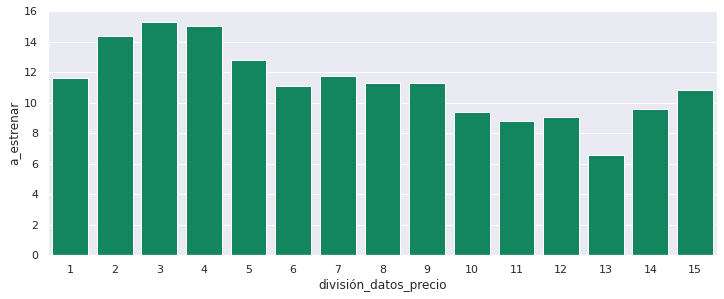

In [91]:
division_precio ('a_estrenar')

<AxesSubplot:xlabel='price_clean', ylabel='state_name'>

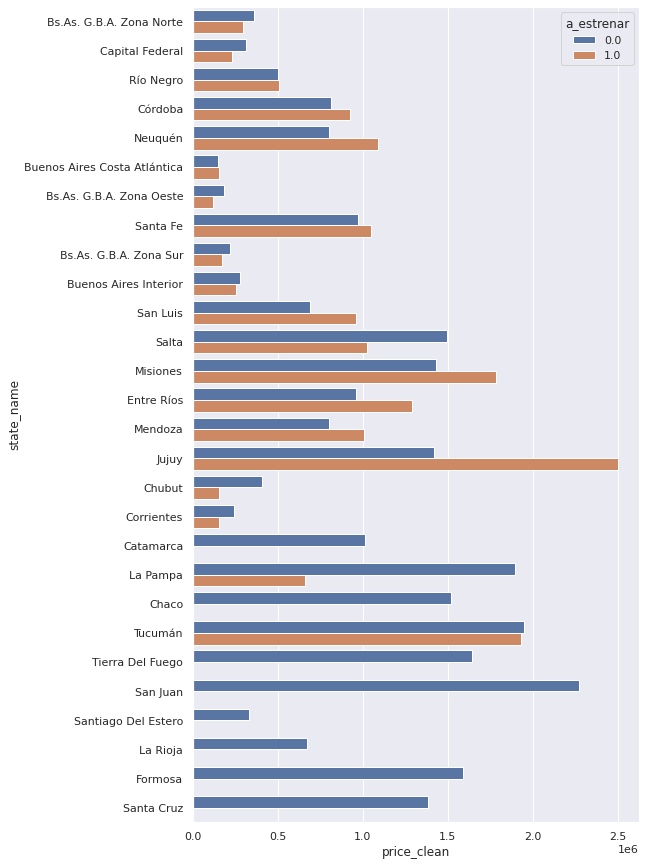

In [92]:
plt.figure(figsize =(8, 15))
sns.barplot(y = 'state_name', x = 'price_clean', hue = 'a_estrenar', data = data, ci=None)

  <a id="section_balcon"></a> 

**5.4. Balcon**: utilizamos regexs para extraer el dato de las columnas titulo y descripcion

[volver a TOC](#section_toc)


In [93]:
# Creo el campo balcon
pattern_balcon = "(?P<balcon>balcon)"
pattern_balcon_regex = re.compile(pattern_balcon,flags = re.IGNORECASE) #Perform case-insensitive matching

rdo_desc = desc_series.apply(lambda x: x if x is np.NaN else pattern_balcon_regex.search(x))
rdo_title = title_series.apply(lambda x: x if x is np.NaN else pattern_balcon_regex.search(x))

data.loc[rdo_desc.notnull(),'balcon'] = 1
data.loc[rdo_title.notnull(),'balcon'] = 1

# corrijo los casos donde lo que aclara es que no tiene balcon
pattern_s_balcon = "(sin balcon|s\s?/\s?bal)"

pattern_s_balcon_regex = re.compile(pattern_s_balcon,flags = re.IGNORECASE) #Perform case-insensitive matching

rdo_desc = desc_series.apply(lambda x: x if x is np.NaN else pattern_s_balcon_regex.search(x))
rdo_title = title_series.apply(lambda x: x if x is np.NaN else pattern_s_balcon_regex.search(x))

data.loc[rdo_desc.notnull(),'balcon'] = 0
data.loc[rdo_title.notnull(),'balcon'] = 0
data['balcon'].fillna(0,inplace=True) # ver!! si no hago una diferenciacion por tipo de propiedad
data['balcon'].value_counts()
#data[(data['balcon']=='S') & (data['property_type']!='apartment')]

0.0    65156
1.0    10805
Name: balcon, dtype: int64

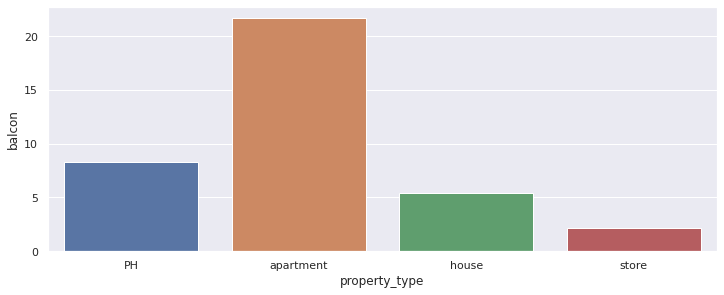

In [94]:
barritas ('balcon')

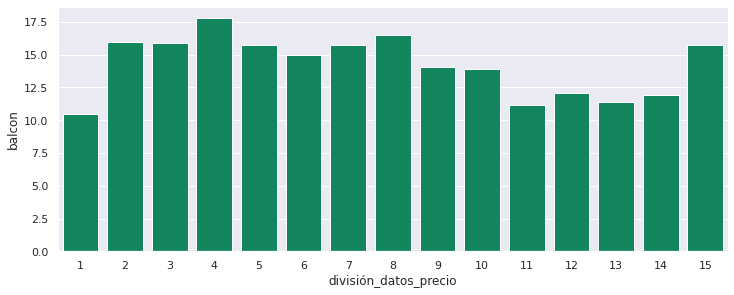

In [95]:
division_precio ('balcon')

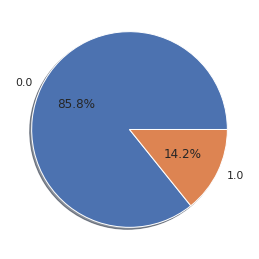

In [96]:
pie ('balcon')

<AxesSubplot:xlabel='price_clean', ylabel='state_name'>

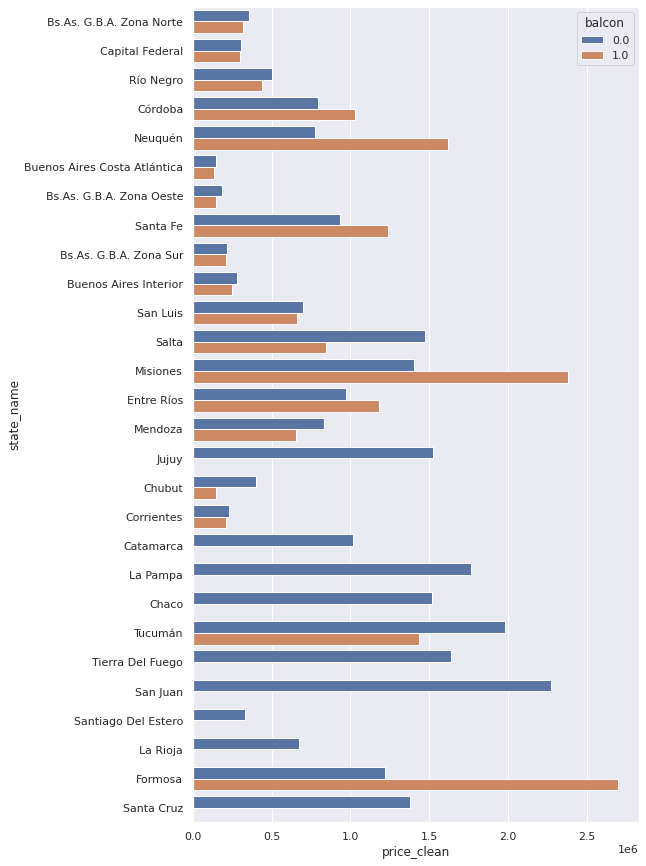

In [97]:
plt.figure(figsize =(8, 15))
sns.barplot(y = 'state_name', x = 'price_clean', hue = 'balcon', data = data, ci=None)

  <a id="section_terraza"></a> 

**5.5. Terraza**: utilizamos regexs para extraer el dato de las columnas titulo y descripcion

[volver a TOC](#section_toc)

In [98]:
pattern_terraza = "(?P<terraza>terraza)"

pattern_terraza_regex = re.compile(pattern_terraza,flags = re.IGNORECASE) #Perform case-insensitive matching

rdo_desc = desc_series.apply(lambda x: x if x is np.NaN else pattern_terraza_regex.search(x))
rdo_title = title_series.apply(lambda x: x if x is np.NaN else pattern_terraza_regex.search(x))

data.loc[rdo_desc.notnull(),'terraza'] = 1
data.loc[rdo_title.notnull(),'terraza'] = 1
data['terraza'].fillna(0,inplace=True)
data['terraza'].value_counts()

0.0    57903
1.0    18058
Name: terraza, dtype: int64

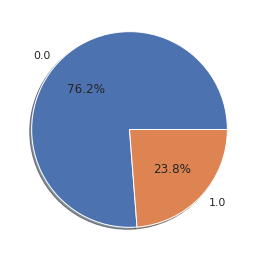

In [99]:
pie ('terraza')

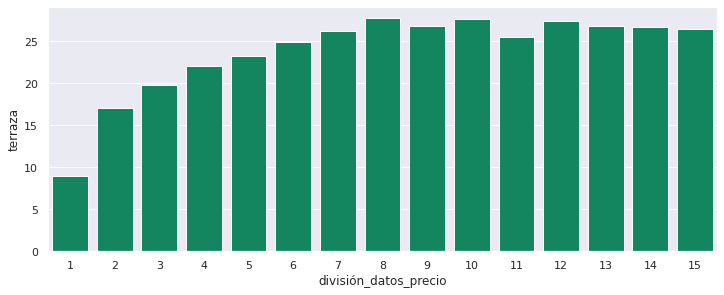

In [100]:
division_precio ('terraza')

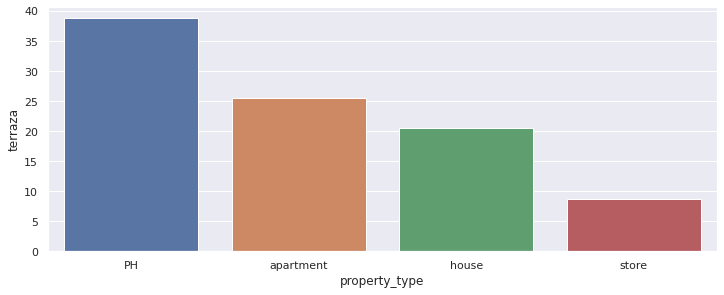

In [101]:
barritas ('terraza')

  <a id="section_parrilla"></a> 

**5.6. Parrilla**: utilizamos regexs para extraer el dato de las columnas titulo y descripcion

[volver a TOC](#section_toc)

In [102]:
pattern_parrilla = "(?P<parrilla>parrilla)"

pattern_parrilla_regex = re.compile(pattern_parrilla,flags = re.IGNORECASE) #Perform case-insensitive matching

rdo_desc = desc_series.apply(lambda x: x if x is np.NaN else pattern_parrilla_regex.search(x))
rdo_title = title_series.apply(lambda x: x if x is np.NaN else pattern_parrilla_regex.search(x))

data.loc[rdo_desc.notnull(),'parrilla'] = 1
data.loc[rdo_title.notnull(),'parrilla'] = 1
data['parrilla'].fillna(0,inplace=True)
data['parrilla'].value_counts()

0.0    51837
1.0    24124
Name: parrilla, dtype: int64

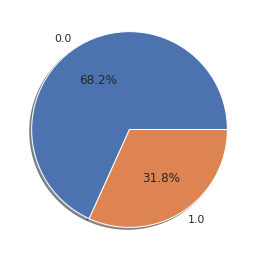

In [103]:
pie ('parrilla')

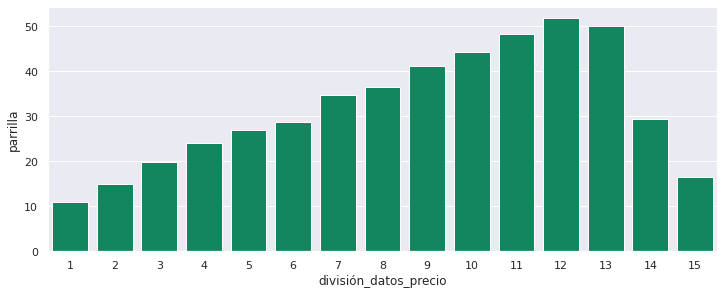

In [104]:
division_precio ('parrilla')

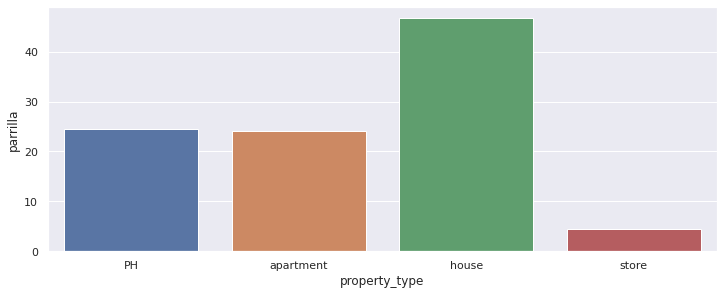

In [105]:
barritas ('parrilla')

  <a id="section_pileta"></a> 

**5.7. Pileta**: utilizamos regexs para extraer el dato de las columnas titulo y descripcion

[volver a TOC](#section_toc)

In [106]:
pattern_pileta = "(?P<pileta>pileta|piscina)"

pattern_pileta_regex = re.compile(pattern_pileta,flags = re.IGNORECASE) #Perform case-insensitive matching

rdo_desc = desc_series.apply(lambda x: x if x is np.NaN else pattern_pileta_regex.search(x))
rdo_title = title_series.apply(lambda x: x if x is np.NaN else pattern_pileta_regex.search(x))

data.loc[rdo_desc.notnull(),'pileta'] = 1
data.loc[rdo_title.notnull(),'pileta'] = 1
data['pileta'].fillna(0,inplace=True)
data['pileta'].value_counts()

0.0    54345
1.0    21616
Name: pileta, dtype: int64

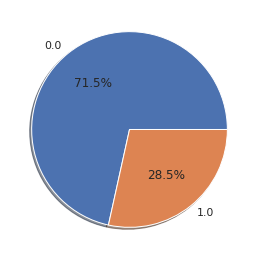

In [107]:
pie ('pileta')

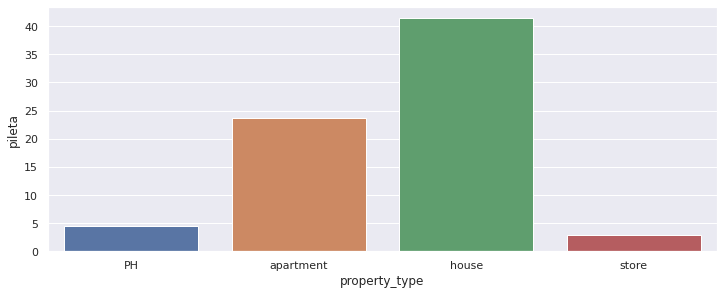

In [108]:
barritas ('pileta')

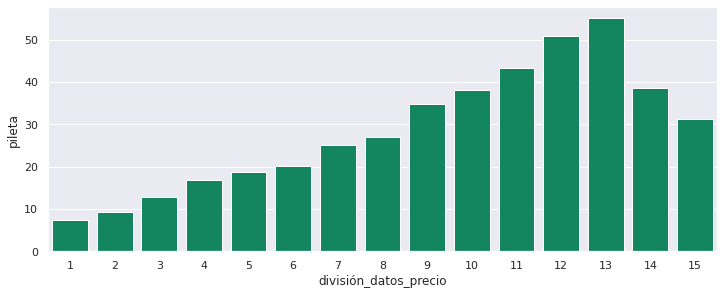

In [109]:
division_precio ('pileta')    

  <a id="section_cochera"></a> 

**5.8. Cochera**: utilizamos regexs para extraer el dato de las columnas titulo y descripcion

[volver a TOC](#section_toc)

In [110]:
# Creo el campo cochera
pattern_cochera = "(?P<cochera>cochera)"
pattern_cochera_regex = re.compile(pattern_cochera,flags = re.IGNORECASE) #Perform case-insensitive matching

rdo_desc = desc_series.apply(lambda x: x if x is np.NaN else pattern_cochera_regex.search(x))
rdo_title = title_series.apply(lambda x: x if x is np.NaN else pattern_cochera_regex.search(x))

data.loc[rdo_desc.notnull(),'cochera'] = 1
data.loc[rdo_title.notnull(),'cochera'] = 1

# corrijo los casos donde lo que aclara es que no tiene cochera
pattern_s_cochera = "(sin cochera|s\s?/\s?cochera)"

pattern_s_cochera_regex = re.compile(pattern_s_cochera,flags = re.IGNORECASE) #Perform case-insensitive matching

rdo_desc = desc_series.apply(lambda x: x if x is np.NaN else pattern_s_cochera_regex.search(x))
rdo_title = title_series.apply(lambda x: x if x is np.NaN else pattern_s_cochera_regex.search(x))

data.loc[rdo_desc.notnull(),'cochera'] = 0
data.loc[rdo_title.notnull(),'cochera'] =0
data['cochera'].fillna(0,inplace=True)
data['cochera'].value_counts()
#data[(data['balcon']=='S') & (data['property_type']!='apartment')]


0.0    49091
1.0    26870
Name: cochera, dtype: int64

##### **5.9. Dummies para tipo de lugar**  <a name="section_dummies_place_type"></a> 

[volver a TOC](#section_toc)

In [111]:
def get_place_type(place):
    s = place.strip('|').split('|')
    if(s[1]=='Capital Federal'):
        if(len(s)==2):
            return "ciudad"
        else:
            return "barrio"
    elif(s[1]=='Buenos Aires Interior'):
        if(len(s)==2):
            return "provincia"
        elif(len(s)==3):
            return "partido"
        else:
            return "ciudad"
    elif(s[1]=='Bs.As. G.B.A. Zona Norte' or s[1]=='Bs.As. G.B.A. Zona Sur' or s[1]=='Bs.As. G.B.A. Zona Oeste'):
        if(len(s)==2):
            return "provincia"
        elif(len(s)==3):
            return "partido"
        elif(len(s)==4):
            if(s[3].lower().find('barrio')!=-1 or s[3].lower().find('country')!=-1):
                return "barrio"
            else:
                return "ciudad"
        else:
            return "barrio"
    elif(s[1]=='Buenos Aires Costa Atlántica'):
        if(len(s)==2):
            return "provincia"
        elif(len(s)==3):
            return "ciudad"
        else:
            return "barrio"
    else:
        if(len(s)==2):
            return "provincia"
        else:
            return "ciudad"

In [112]:
parent_names = data['place_with_parent_names']

In [113]:
place_type = parent_names.apply(get_place_type)

In [114]:
data['place_type'] = place_type

In [115]:
dummies_place_type_lbl = pd.get_dummies(data["place_type"],prefix="place_type_lbl",drop_first=False)
data_with_dummies = data.join(dummies_place_type_lbl)

data_result = data_with_dummies.drop(labels=['place_type'], axis="columns")
data_result.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title,price_usd_clean,price_clean,currency_clean,price_local_currency_clean,surface_total_in_m2_clean,surface_covered_in_m2_clean,surface_total_in_m2_regex,surface_covered_in_m2_regex,rooms_regex,ambientes,ambientes_regex,clean_floor,price_usd_per_m2_clean,price_per_m2_clean,title2,largo_description,división_datos_precio,seguridad,jardin,a_estrenar,balcon,terraza,parrilla,pileta,cochera,place_type_lbl_barrio,place_type_lbl_ciudad,place_type_lbl_partido,place_type_lbl_provincia
5179,sell,house,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.447361,-58.631426",-34.447361,-58.631426,345000.0,USD,6087352.5,345000.0,849.0,209.0,406.360424,1650.717703,NaN,3.0,NaN,Casa en venta en el barrio cerrado San Gabriel...,CASA en VENTA en COMPLEJO VILLA NUEVA - San Ga...,345000.0,345000.0,USD,6087352.5,849.000000,209.0,0.0,0.0,NaN,3.0,NaN,NaN,406.360424,406.360424,CASAENVENTAENCOMPLEJOVILLANUEVASANGABRIEL,16319,11,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0,1,0,0
112428,sell,house,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,3427753.0,NaN,NaN,NaN,437000.0,USD,7710646.5,437000.0,NaN,205.0,NaN,2131.707317,NaN,NaN,NaN,"M2 lote:937,81 m2M2 cubiertos 205,31 m2M2 semi...",Casa - San Rafael,437000.0,437000.0,USD,7710646.5,299.713996,205.0,938.0,938.0,NaN,NaN,NaN,NaN,1458.056700,1458.056700,CASASANRAFAEL,15008,12,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0,0,1,0
93253,sell,house,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,3427753.0,NaN,NaN,NaN,467000.0,USD,8239981.5,467000.0,NaN,220.0,NaN,2122.727273,NaN,NaN,NaN,"M2 lote: 865,81 m2M2 cubiertos:220,21 m2M2 sem...",Casa - San Gabriel,467000.0,467000.0,USD,8239981.5,321.644288,220.0,866.0,866.0,NaN,NaN,NaN,NaN,1451.914481,1451.914481,CASASANGABRIEL,14748,13,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0,0,1,0
92333,sell,house,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,3427753.0,NaN,NaN,NaN,345000.0,USD,6087352.5,345000.0,NaN,210.0,NaN,1642.857143,NaN,NaN,NaN,Casa a estrenar en San Gabriel Lote interno en...,San Gabriel a estrenar,345000.0,345000.0,USD,6087352.5,307.024093,210.0,0.0,0.0,NaN,NaN,NaN,NaN,1123.690314,1123.690314,SANGABRIELAESTRENAR,11363,11,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0,0,1,0
18603,sell,apartment,Coghlan,|Argentina|Capital Federal|Coghlan|,Argentina,Capital Federal,3435359.0,"-34.5609681,-58.4758459",-34.560968,-58.475846,199000.0,USD,3511255.5,199000.0,65.0,62.0,3061.538462,3209.677419,NaN,2.0,NaN,"2 amb mas escritorio y/o 3er Dormitorio ""COMPL...",Complejo Erre Venta 2 amb y 1/2 Freire 2443 no...,199000.0,199000.0,USD,3511255.5,65.000000,62.0,NaN,NaN,0.0,2.0,1.0,5,3061.538462,3061.538462,COMPLEJOERREVENTA2AMBY12FREIRE2443NOAPTOCREDITO,9869,8,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1,0,0,0


[Volver a subíndice](#section_varnuevas)

##### **5.10. Provincia, ciudad, partido y barrio**  <a name="section_places"></a>

[volver a TOC](#section_toc)

In [116]:
#col provincia
bs_as= ['Capital Federal','Bs.As. G.B.A. Zona Norte','Bs.As. G.B.A. Zona Sur','Buenos Aires Costa Atlántica','Bs.As. G.B.A. Zona Oeste','Buenos Aires Interior']
provincia = data["state_name"].apply(lambda x:x if x not in bs_as else "Buenos Aires")
data["provincia"] = provincia

In [117]:
def get_parent_city(place):
    p = place.strip('|').split('|')
    if(len(p)>3 and p[1]=='Capital Federal'):
        return p[-3]
    elif (len(p)==4 and (p[1]=='Bs.As. G.B.A. Zona Norte' or p[1]=='Bs.As. G.B.A. Zona Sur' or p[1]=='Bs.As. G.B.A. Zona Oeste' or p[1]=='Buenos Aires Interior')):
        return "N.A"
    else:
        return p[-2]

In [118]:
#col ciudad
#obtenemos registros que llegan hasta nivel de ciudad
city_dummie_mask = data_with_dummies['place_type_lbl_ciudad'] == 1
nivel_ciudad = data_with_dummies[city_dummie_mask]
ciudad = nivel_ciudad["place_name"]
#obtenemos registros que llegan hasta nivel de barrio
#para luego saber a qué ciudad pertenecen
barrio_dummie_mask = data_with_dummies['place_type_lbl_barrio'] == 1
barrio = data_with_dummies[barrio_dummie_mask]
ciudad_barrio = barrio['place_with_parent_names'].apply(get_parent_city)
ciudad_barrio
#definimos col ciudad
data.loc[ciudad.index,"ciudad"] = ciudad
data.loc[ciudad_barrio.index,"ciudad"] = ciudad_barrio
#completamos con N.A si no corresponde indicar ciudad
city_fill = data["ciudad"].fillna("N.A")
data["ciudad"] = city_fill

In [119]:
#col barrio
barrio_name = barrio["place_name"]
data.loc[barrio_name.index,"barrio"] = barrio_name
barrio_fill = data["barrio"].fillna("N.A")
data["barrio"] = barrio_fill
data["barrio"]

5179          N.A
112428        N.A
93253         N.A
92333         N.A
18603     Coghlan
           ...   
50342         N.A
82056         N.A
28489     Palermo
30598     Almagro
67371         N.A
Name: barrio, Length: 75961, dtype: object

In [120]:
#col partidos
#completamos place_name faltantes
null_place_name_mask = data['place_name'].isnull()
null_place_name = data[null_place_name_mask]
place_name_fill = data["place_name"].fillna("Tigre")
data["place_name"] = place_name_fill

In [121]:
def get_parent_partido(place):
    p = place.strip('|').split('|')
    if(len(p)==4):
        return p[-2]
    elif(len(p)>=5):
        return p[-3]

In [122]:
#obtenemos registros que llegan hasta nivel de partido
partido_dummie_mask = data_with_dummies['place_type_lbl_partido'] == 1
nivel_partido = data_with_dummies[partido_dummie_mask]
partido = nivel_partido["place_name"]

#obtenemos barrios o ciudades que estén en BA interior,N,S y O
zonas_ba = ['Bs.As. G.B.A. Zona Norte','Bs.As. G.B.A. Zona Sur','Bs.As. G.B.A. Zona Oeste','Buenos Aires Interior']
zonas_ba_mask = data_with_dummies['state_name'].apply(lambda x:True if x in zonas_ba else False)
ba = data_with_dummies[zonas_ba_mask]

#obtenemos partidos de ciudades de BsAs
ba_cities_mask = ba['place_type_lbl_ciudad']==1
ba_cities = ba.loc[ba_cities_mask,"place_with_parent_names"]
ba_cities_partido = ba_cities.apply(get_parent_partido)

#obtenemos partidos de barrios de BsAs
ba_barrios_mask = ba['place_type_lbl_barrio']==1
ba_barrios = ba.loc[ba_barrios_mask,"place_with_parent_names"]
ba_barrios_partido = ba_barrios.apply(get_parent_partido)

#definimos col partido
data.loc[partido.index,"partido"] = partido
data.loc[ba_cities_partido.index,"partido"] = ba_cities_partido
data.loc[ba_barrios_partido.index,"partido"] = ba_barrios_partido
#completamos con N.A si no corresponde indicar ciudad
partido_fill = data["partido"].fillna("N.A")
data["partido"] = partido_fill

In [123]:
data[["provincia","ciudad","barrio","partido"]].sample(5)

,provincia,ciudad,barrio,partido
24398,Buenos Aires,Capital Federal,Coghlan,N.A
90884,Buenos Aires,Longchamps,N.A,Almirante Brown
55016,Buenos Aires,Mar del Plata,N.A,N.A
74888,Buenos Aires,Banfield,N.A,Lomas de Zamora
59978,Buenos Aires,Capital Federal,Belgrano,N.A


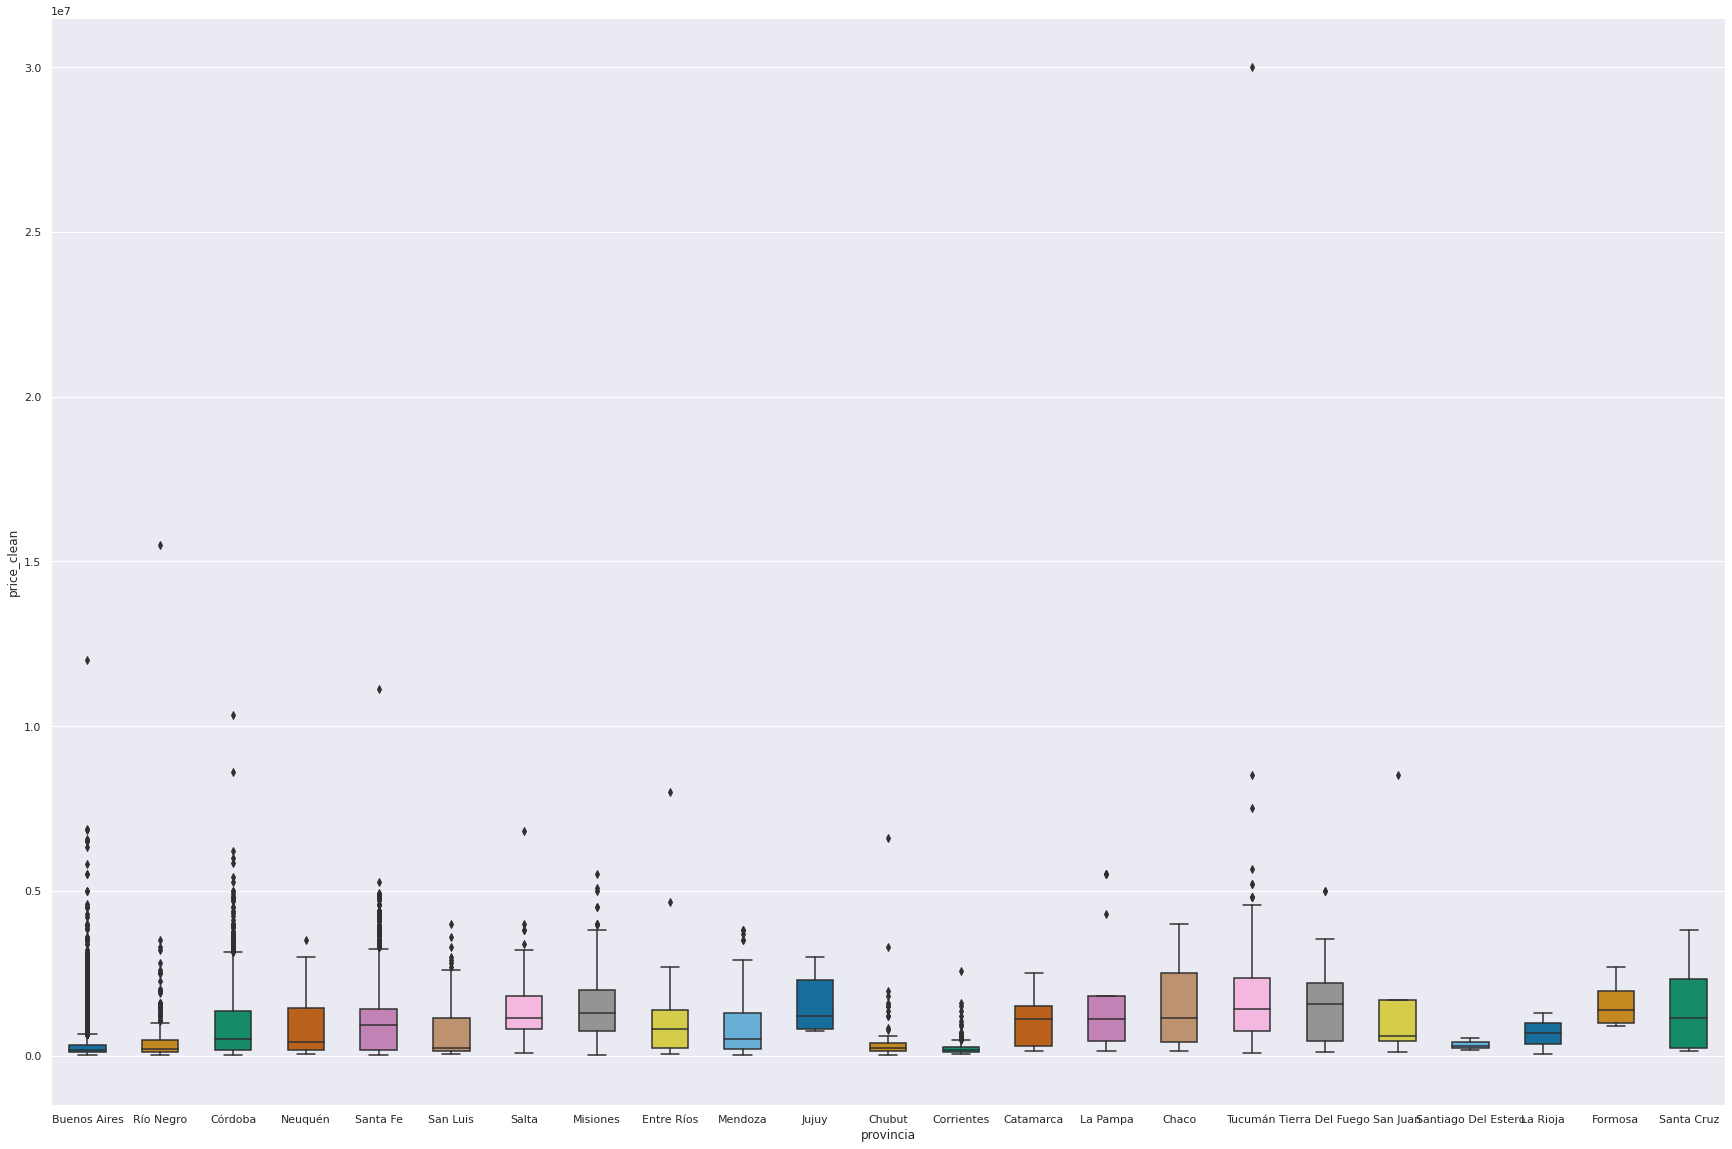

In [124]:
sns.set(rc={"figure.figsize": (30, 20)})
bplot = sns.boxplot(y='price_clean', x='provincia', 
                 data=data, 
                 width=0.5,
                 palette="colorblind")

Construimos una tabla resumen para comparar media y desvío estándar de precio en USD de departamentos y su sup cubierta en m2 por barrios de Capital Federal

In [125]:
data_dto_mask = data['property_type']=='apartment'
data_barrio_mask = data['barrio']!='N.A'
data_cf_mask = data['state_name']=='Capital Federal'
barrio_dto_mask = np.logical_and(data_dto_mask,data_barrio_mask)
cf_dto_barrio_mask = np.logical_and(data_cf_mask,barrio_dto_mask)

data_barrio_cf = data[cf_dto_barrio_mask]

In [126]:
data_barrio_cf.pivot_table(index=['barrio'],aggfunc={'price_usd_clean':[np.mean,np.std],'surface_covered_in_m2_clean':[np.mean,np.std]})

price_usd_clean                surface_covered_in_m2_clean  \
                            mean            std                        mean   
barrio                                                                        
Abasto             125454.371194   62045.219518                   54.699165   
Agronomía          129049.038462   40443.432644                   53.041007   
Almagro            156479.408009  114040.118710                   64.678767   
Balvanera          132492.622208   85009.734099                   76.394401   
Barracas           180364.127510  130007.028667                   77.772360   
...                          ...            ...                         ...   
Villa Riachuelo     85000.000000            NaN                   60.000000   
Villa Santa Rita   114894.444444   62351.834119                   53.148148   
Villa Soldati       63360.405714   16446.877493                   63.571429   
Villa Urquiza      156002.195243   86714.740685                   54.558136   
Villa del Parque   146294.617768   83014.168917                   61.043681   

                              
                         std  
barrio                        
Abasto             26.297810  
Agronomía          21.423383  
Almagro           133.971746  
Balvanera         178.948675  
Barracas           64.239127  
...                      ...  
Villa Riachuelo          NaN  
Villa Santa Rita   32.292776  
Villa Soldati      14.830792  
Villa Urquiza      29.082106  
Villa del Parque   40.658868  

[61 rows x 4 columns]

Scatterplot categórico de precio en usd para departamentos localizados en los siguientes barrios de Capital Federal: 
Belgrano,Barrio Norte,Palermo,Mataderos,Flores,Caballito,Boca,Villa Crespo,Chacarita

In [127]:
lista_barrios_cf = ['Belgrano','Barrio Norte','Palermo','Mataderos','Flores','Caballito','Boca','Villa Crespo','Chacarita']
d_b_cf_mask = data_barrio_cf['barrio'].apply(lambda x:True if x in lista_barrios_cf else False)
d_b_cf = data_barrio_cf[d_b_cf_mask]

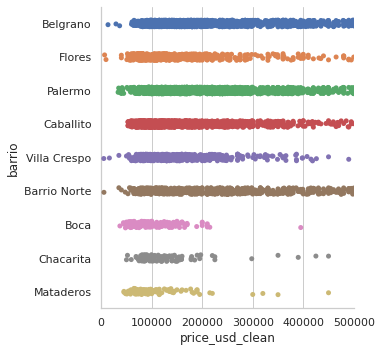

In [128]:
sns.set_theme(style="whitegrid")
sns.catplot(x="price_usd_clean", y="barrio", data=d_b_cf)
plt.xlim(0,500000)
plt.show()

Construimos una tabla resumen para comparar promedio de precio por m2 en USD de tipo de propiedades por state_name y ciudad

In [129]:
prop_list = ['apartment','house']
prop_mask = data['property_type'].apply(lambda x:True if x in prop_list else False)

In [130]:
prov_list = ['Córdoba','Santa Fe','Misiones','Buenos Aires Costa Atlántica']
prov_mask = data['state_name'].apply(lambda x:True if x in prov_list else False)
prop_prov_mask = np.logical_and(prop_mask,prov_mask)
prov_subset = data[prop_prov_mask]
city_exists_mask = prov_subset['ciudad']!='N.A'
prov_subset_filled = prov_subset[city_exists_mask] 

In [131]:
prov_subset_filled.pivot_table('price_usd_per_m2_clean', ['state_name', 'ciudad'], ['property_type']).head(10)

property_type                                     apartment        house
state_name                   ciudad                                     
Buenos Aires Costa Atlántica Aguas Verdes        706.250000   213.411319
                             Camet                      NaN   520.840230
                             Cariló             2675.867511  1129.925386
                             Chapadmalal                NaN   369.506061
                             Claromecó           471.996638   352.253213
                             Costa Azul         1174.433158   870.196227
                             Costa Esmeralda            NaN  1406.128495
                             Costa del Este             NaN  3821.094579
                             Dunamar                    NaN   888.380191
                             La Lucila del Mar   943.067423  1853.643397

En el histograma podemos observar cómo se distribuye la variable de precio en USD por m2 para algunas de las ciudades más pobladas de Argentina. El eje y representa el nro de observaciones que hay en cada bin

In [132]:
cities_list = ['Córdoba','Santa Fe','Capital Federal','Rosario']
c_mask = data['ciudad'].apply(lambda x:True if x in cities_list else False)
data_c = data[c_mask]

(0.0, 800.0)

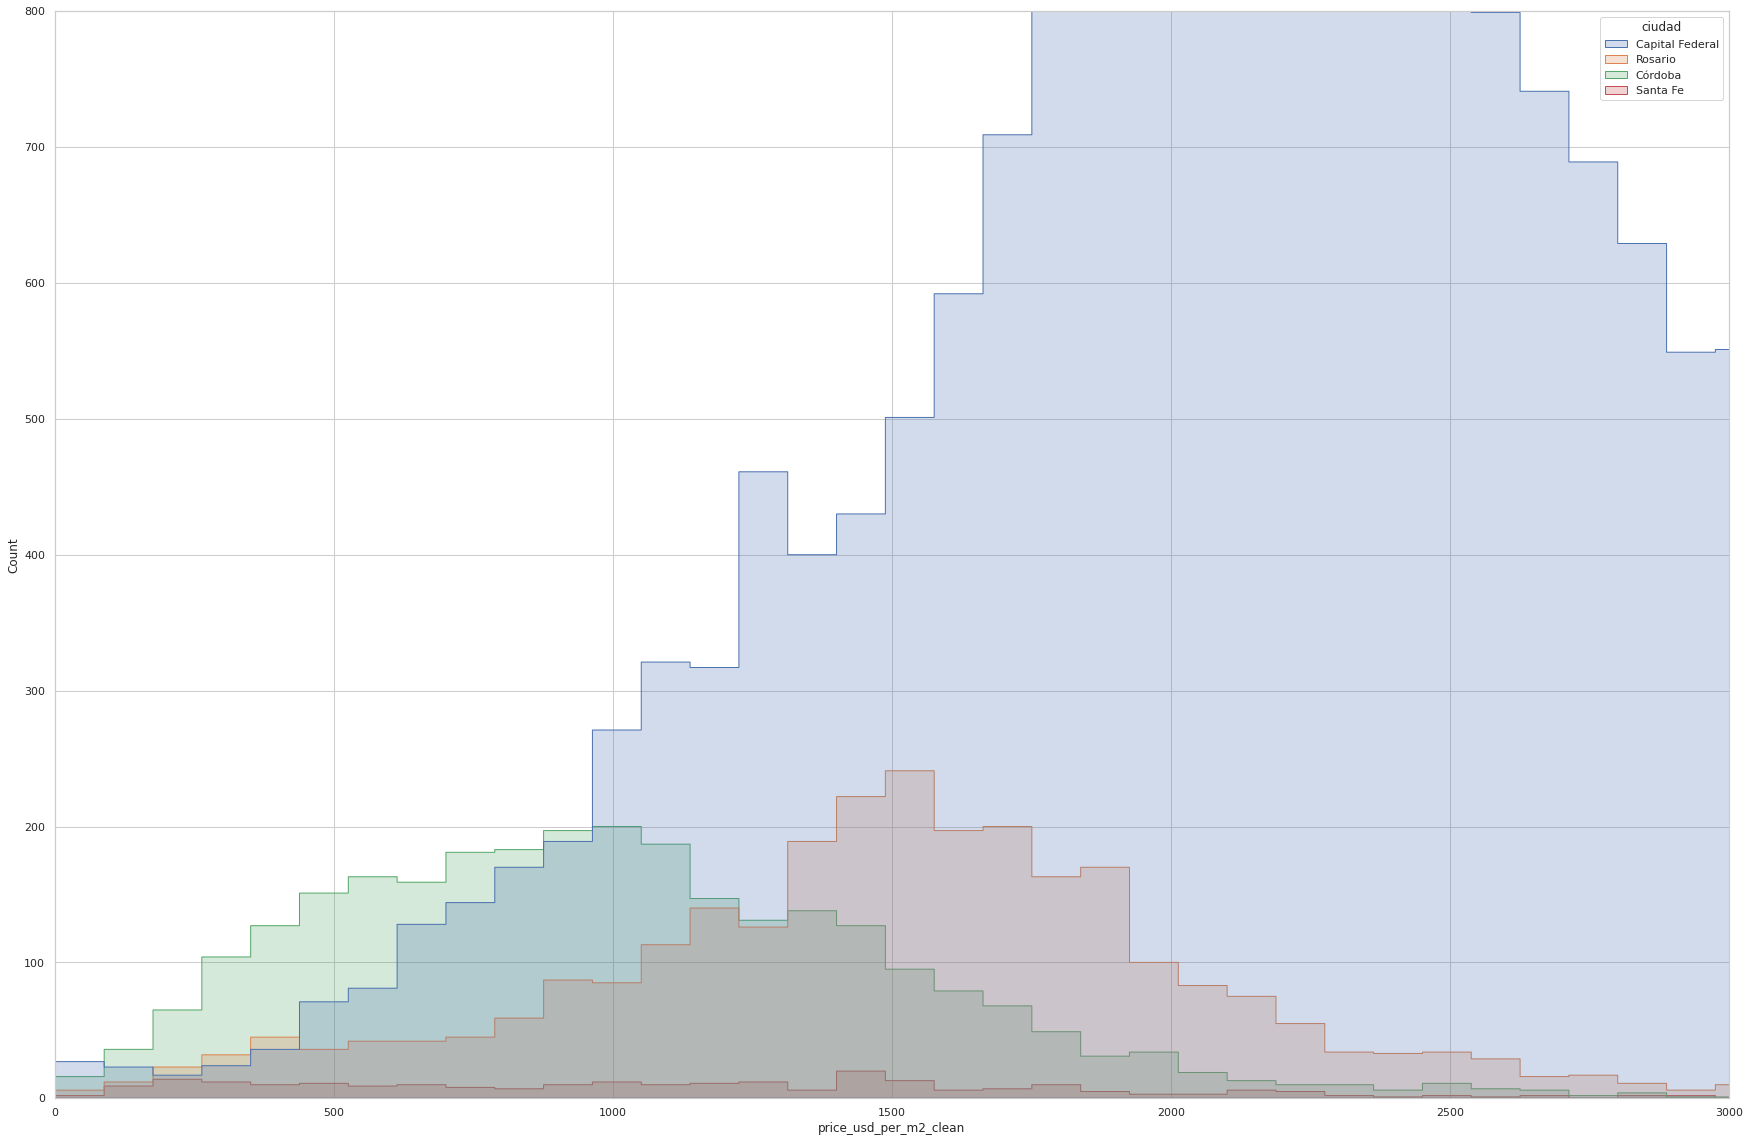

In [133]:
sns.histplot(data=data_c, x="price_usd_per_m2_clean",element='step', hue="ciudad")
plt.xlim(0, 3000)
plt.ylim(0, 800)

## 6. Dataset Final

[volver a TOC](#section_toc)

Eliminamos las columnas provisorias:

In [134]:
data.drop(['ambientes_regex','rooms_regex','rooms','expenses','surface_covered_in_m2','surface_total_in_m2','price_aprox_local_currency','price_aprox_usd','price','currency','surface_total_in_m2_regex','surface_covered_in_m2_regex','price_per_m2','price_usd_per_m2','floor'], axis=1,inplace=True)